In [1]:
from helpers import *
from sentiment_functions import *
from emotion_functions import *

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-05-23 13:34:07.342863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-23 13:34:07.342886: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-23 13:34:09.605047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-23 13:34:09.605083: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05

# SENTIMENT ANALYSIS

In [2]:
df= pd.read_csv('/home/david/Escritorio/sa_bertsent_sp_english_sentences_title.csv')

In [3]:
df=df.drop(df[df['Date']<'2020-01-01'].index,inplace=False)

In [4]:
df=df.drop(df[df['Date']>'2021-10-31'].index,inplace=False)

In [5]:
df.replace({'sentiment_title': 1}, {'sentiment_title': 'Neutral'}, regex=True,inplace=True)
df.replace({'sentiment_title': 0}, {'sentiment_title': 'Negative'}, regex=True,inplace=True)
df.replace({'sentiment_title': 2}, {'sentiment_title': 'Positive'}, regex=True,inplace=True)

In [ ]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

In [ ]:
list_porcentage_positive_sentences=[]
list_porcentage_neutral_sentences=[]
list_porcentage_negative_sentences=[]
for index,row in df.iterrows(): 
    list_porcentage_negative_sentences.append(df['list_labels'][index].count(0)/len(df['list_labels'][index]))
    list_porcentage_neutral_sentences.append(df['list_labels'][index].count(1)/len(df['list_labels'][index]))
    list_porcentage_positive_sentences.append(df['list_labels'][index].count(2)/len(df['list_labels'][index]))
df['porcentage_positive']=list_porcentage_positive_sentences
df['porcentage_negative']=list_porcentage_negative_sentences
df['porcentage_neutral']=list_porcentage_neutral_sentences

In [ ]:
df['n_words'] = df.Text_en.apply(lambda x: len(str(x).split(' ')))
df['Country']="Spain"

In [ ]:
df[df.Newspaper.isna()]

In [ ]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_sp_english_sentences_title.csv', index = False)

In [3]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_sp_english_sentences_title.csv')

# General descriptive analysis of articles in SPAIN

In [3]:
list_sentences=[]
for index,row in df.iterrows(): 
    for sentence in df['list_sentences'][index]:
        list_sentences.append(sentence)
len(list_sentences)

71605784

SAMPLES OF POSITIVE HEADLINES
Pfizer's covid vaccine is highly effective in adolescents
The president of the Spanish Association of Vaccinology assures that this year's flu vaccination is a must.
Acceptance for leaving the mask behind soars
SAMPLES OF NEGATIVE HEADLINES
Germany enters second "hard lockdown" with record number of deaths
G. Caballero urges Feijóo to hold the mayoress of Boimorto "responsible" for her "irregular" vaccination
Inequitable distribution of Covid-19 vaccines could make pandemic last 7 years longer


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


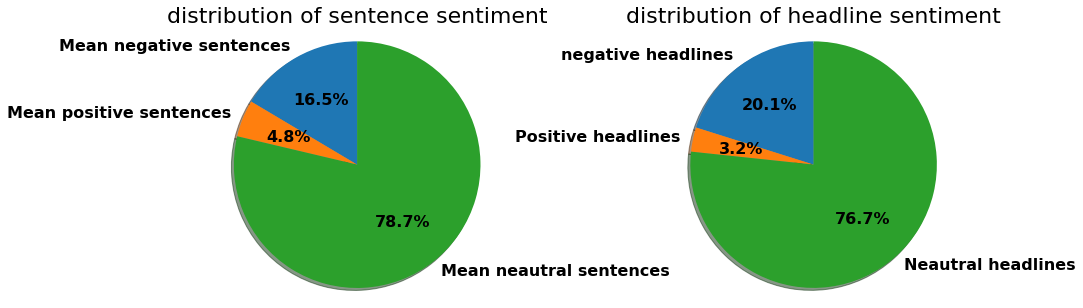

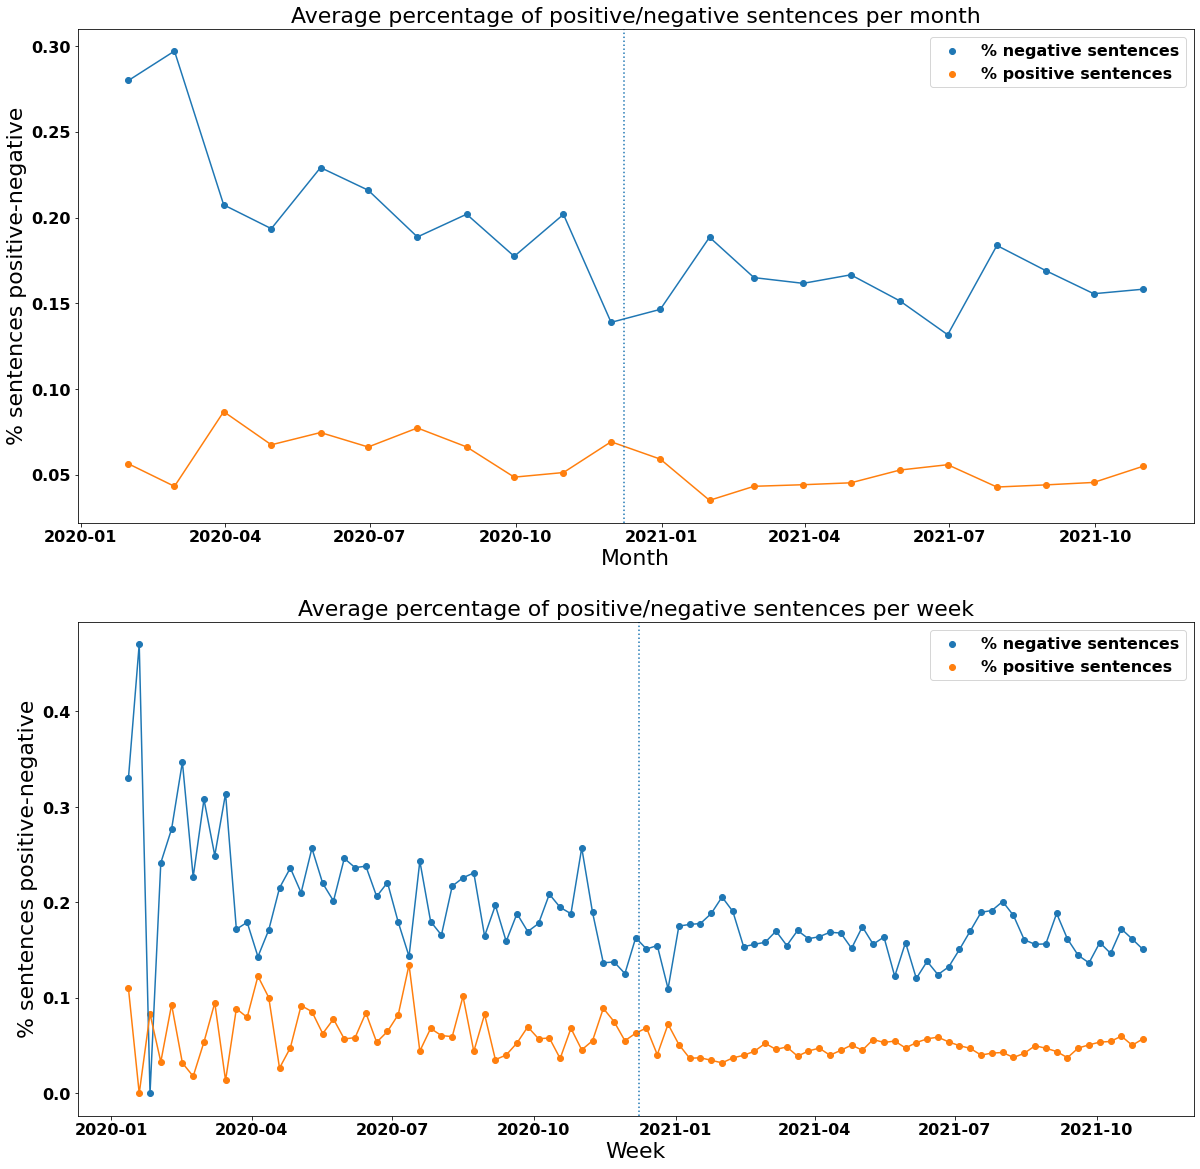

In [4]:
sentiment_analysis(df,'2020-12-08')

In [5]:
emotion_analysis(df)

In [7]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_sp_english_title_emotion.csv', index = False)

In [4]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_sp_english_title_emotion.csv')

In [5]:
def plot_emotions(subset):
        
    my_labels = subset['emotion_transformers_1'].value_counts().sort_values().unique()
    ax = subset['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct)
    ax.axes.get_yaxis().set_visible(False)
    plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


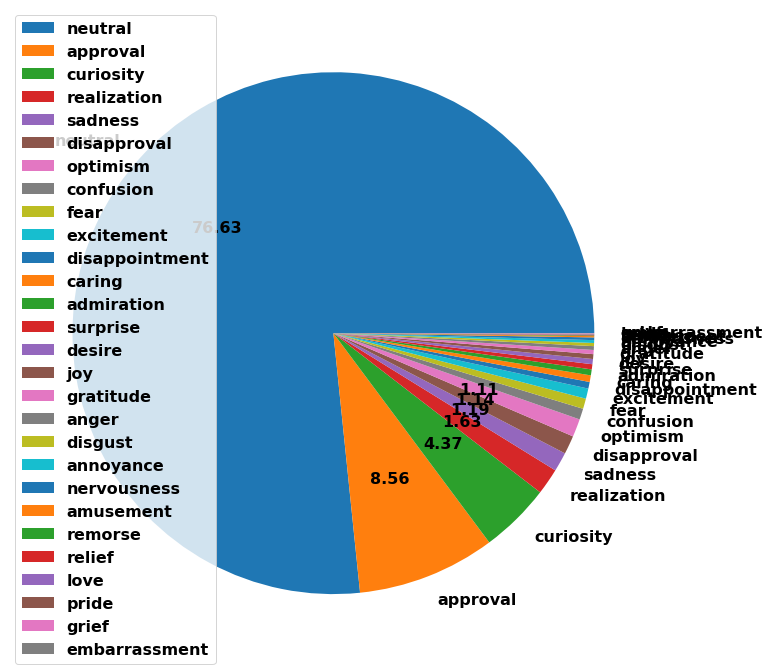

In [6]:
plot_emotions(df)

# SUBTOPICS 

I think it is useful for the analysis of subtopics not to take into account the articles that review the most important news of the week, because they deal with many different topics and I consider that they have an impact on the results.

In [7]:
df_sub=df.drop(df[df['n_words']>3000].index,inplace=False)

In [8]:
ue_words="European Union|EU|European Commission"
european_union=df_sub[(df_sub['Title_en'].str.contains(ue_words))|(df_sub['Text_en'].str.contains(ue_words))]

In [9]:
len(european_union)/len(df_sub)

0.16179956896551725

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
UK approves Pfizer-BioNTech's COVID vaccine and will start to roll it out next week
Brexit deal gives European stock markets a boost
Accelerating vaccination is the best economic policy that can be made.
SAMPLES OF NEGATIVE HEADLINES
Vaccination at risk in 10 autonomous communities due to procurement failure
The US does not know what to do with its surplus vaccine doses while Europe is running low.
CureVac, the 'double shield' vaccine, to flood EU with 225 million doses


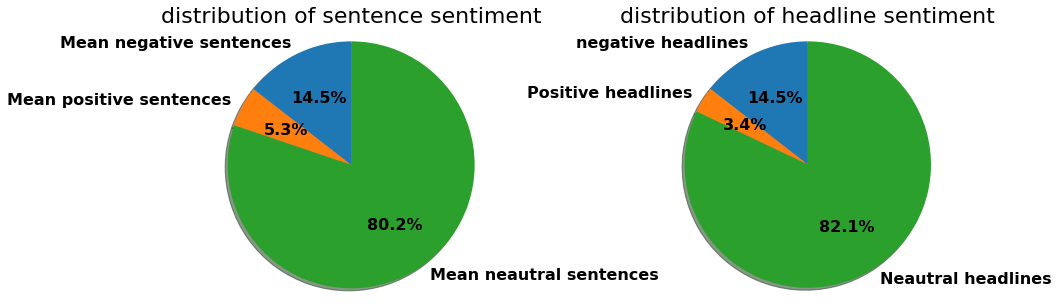

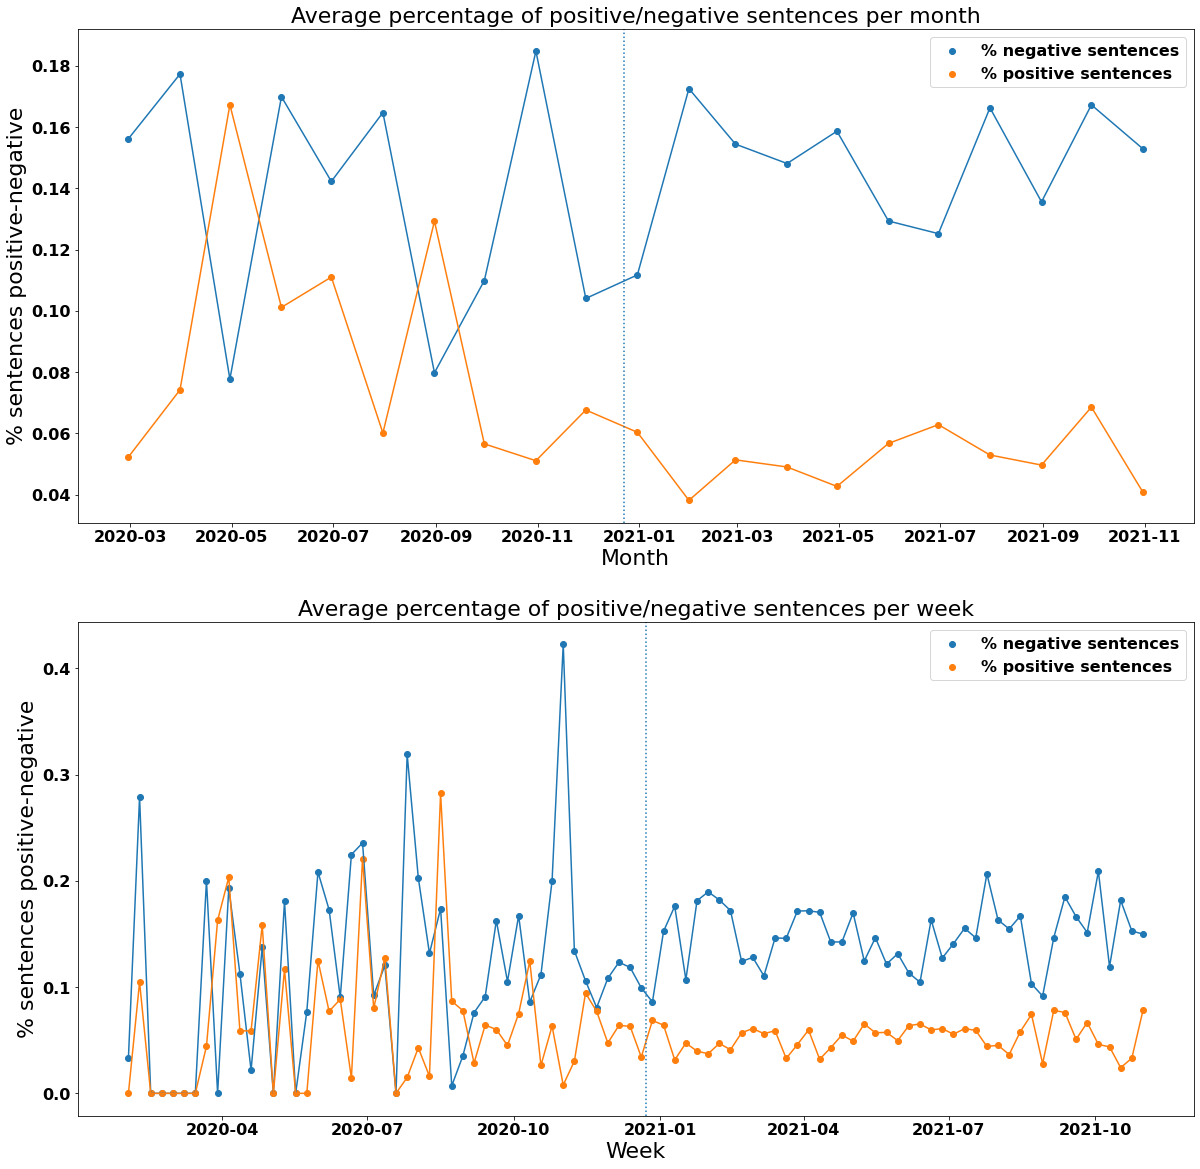

In [10]:
sentiment_analysis(european_union,'2020-12-23')

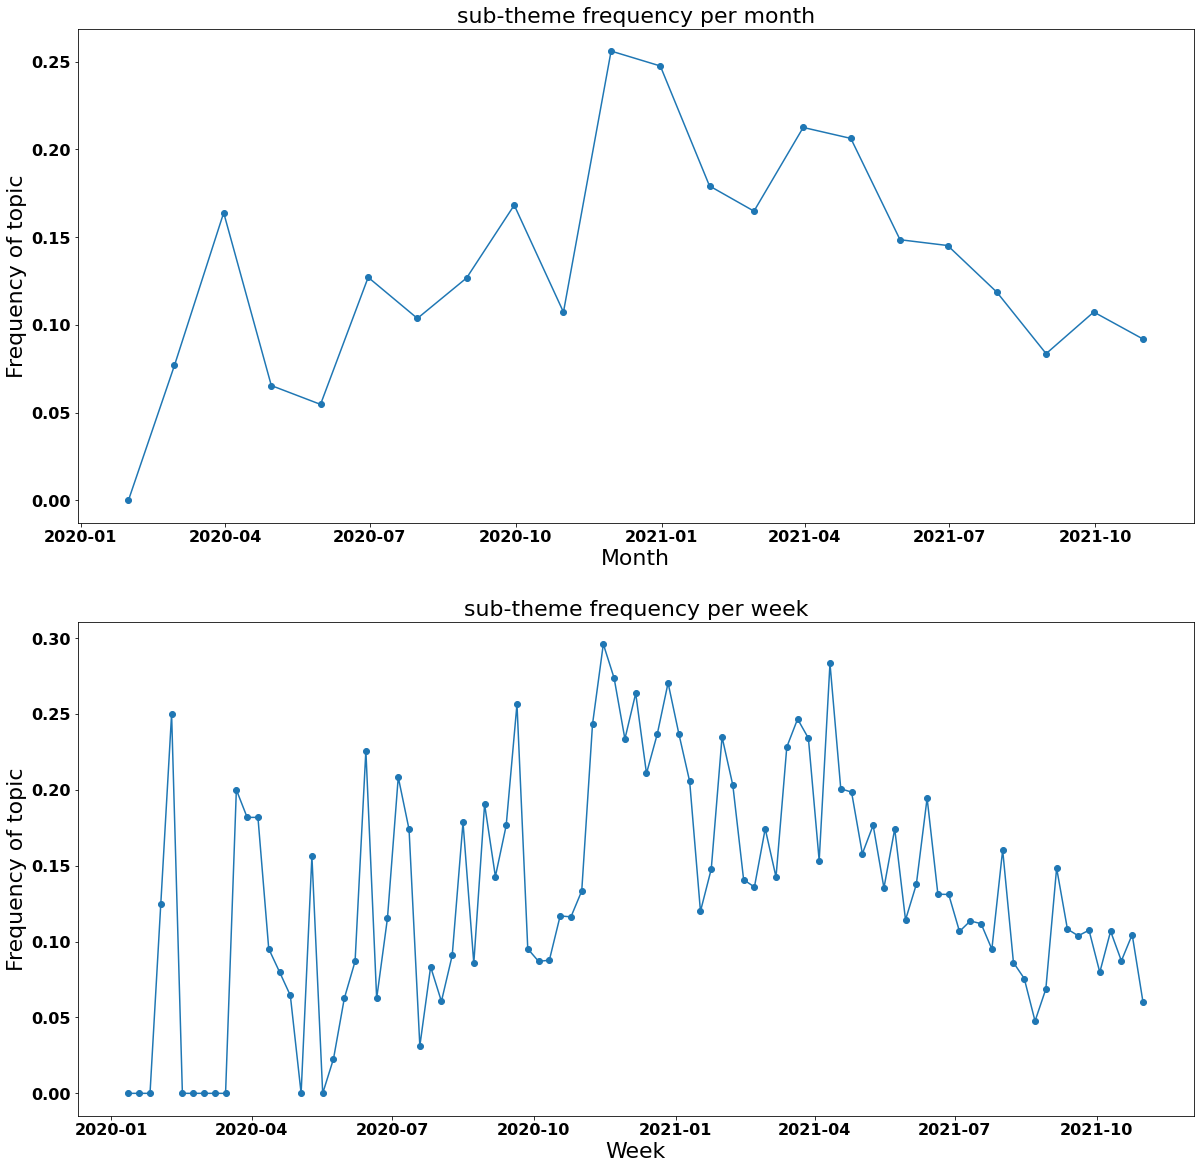

In [11]:
frequency_topics(df_sub, european_union)

In [16]:
# #get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(european_union.list_labels[39]) if x == 0]
# for i in indices: 
#     print(european_union.list_sentences[39][i])

SAMPLES OF POSITIVE SENTENCES
"Personally, I am happy that we are starting to take the veil off," says an EU official.
Within the European Union, Spain is the country with the highest growth outlook, at 6.8% for this year and 6.6% for next year.
SAMPLES OF NEGATIVE SENTENCES
It is also the cheapest vaccine of all those developed in or for the EU.
The EUA requirements are less stringent than the normal approval process and products approved under the EUA may not make it through the normal process.


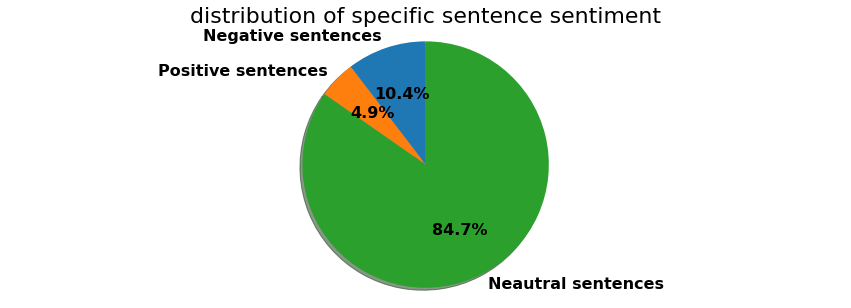

In [17]:
sentences_with_word(european_union,ue_words)

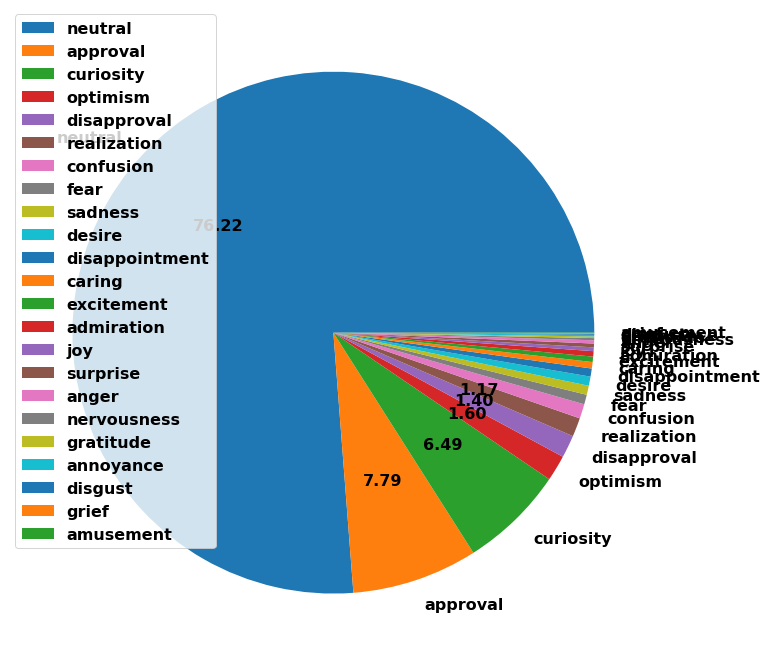

In [12]:
plot_emotions(european_union)

In [13]:
no_vax_words="anti-vaxxers|anti-vaccine|anti-vaxx|anti-corona|no-vax|no vax|anti-vaccin"
no_vax=df_sub[(df_sub['Title_en'].str.contains(no_vax_words))|(df_sub['Text_en'].str.contains(no_vax_words))]
len(no_vax)/len(df_sub)

0.015355603448275862

SAMPLES OF POSITIVE HEADLINES
The keys to Chile's success in covid-19 vaccination
Regeneron announces positive results for covid-19 treatment
Adriana Muñoz, Catalan nurse in the UK: "I feel very lucky to have received the vaccine".
SAMPLES OF NEGATIVE HEADLINES
A quarter of the world's population will not receive COVID vaccine until at least 2022 after rich countries stockpile doses
Galicia wants to fine anyone who skips isolation up to 60,000 euros and 3,000 euros for anyone who does not get vaccinated.
Why so many French fear dictatorship and civil war


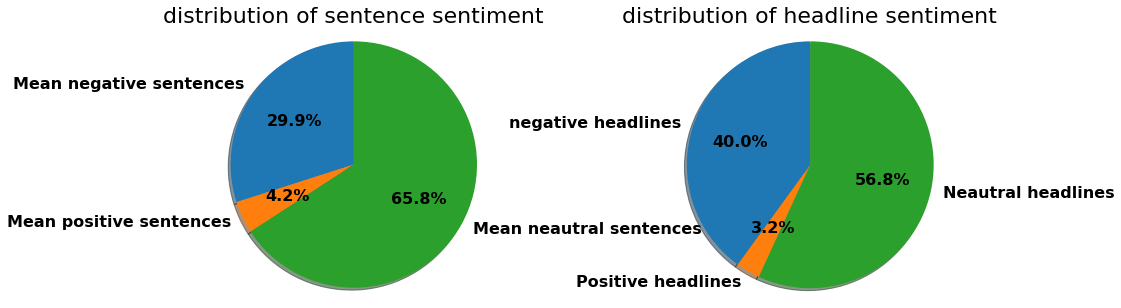

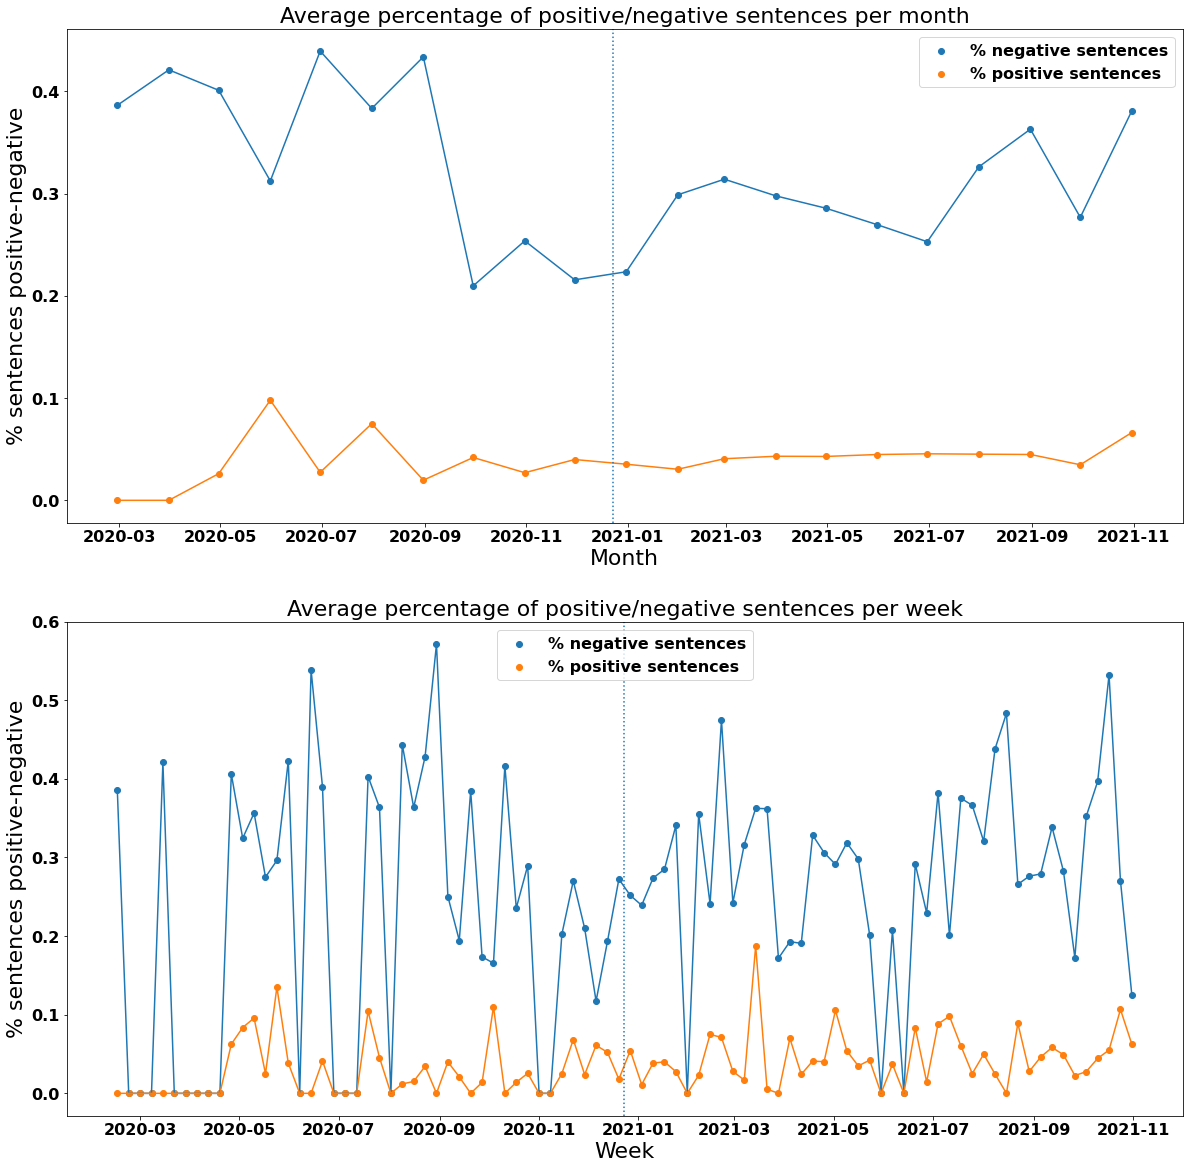

In [14]:
sentiment_analysis(no_vax,'2020-12-23')

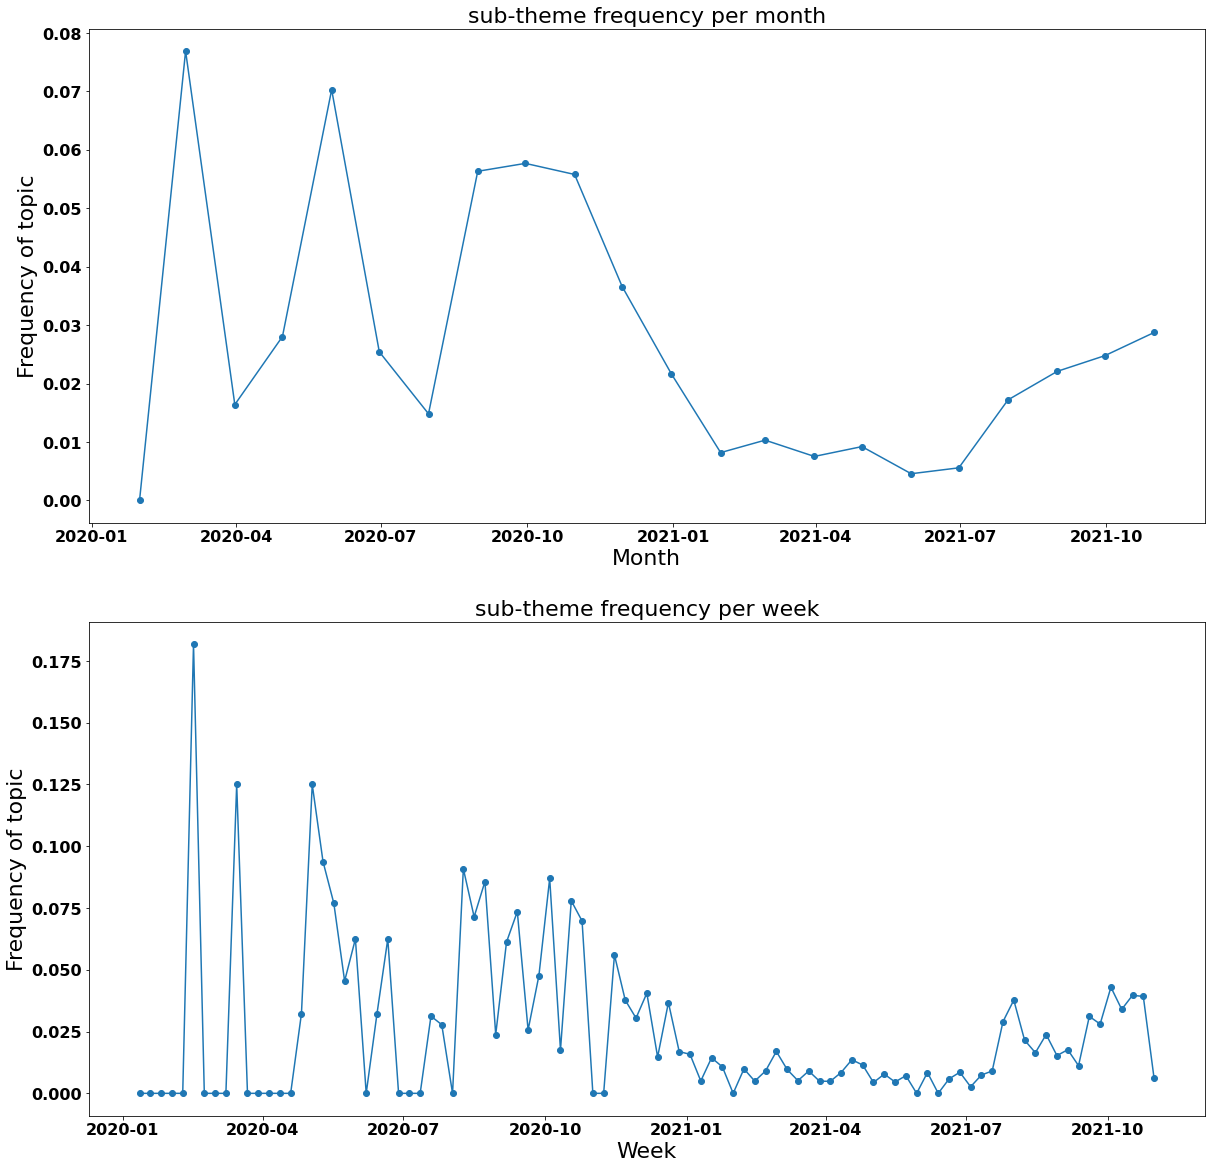

In [15]:
frequency_topics(df_sub, no_vax)

In [21]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(no_vax.list_labels[33]) if x == 0]
# for i in indices: 
#     print(no_vax.list_sentences[33][i])

SAMPLES OF POSITIVE SENTENCES
Another reason for Spain's success in terms of vaccination was "the low level of anti-vaccination" among the Spanish population, as well as the work of the media in bringing vaccination and infection figures for each autonomous community to the table.
Carolina Darias also referred to the anti-vaccine movement, pointing out that in Spain there is a "great awareness" of vaccination because it is known that "vaccines save lives", stressing that the Covid vaccines "are here to stay" and "have saved thousands of lives in Spain".
SAMPLES OF NEGATIVE SENTENCES
Both in Spain and around the world, major Google platforms such as YouTube have been flooded with anti-vaccine and virus denialists.
But the anti-vaccine sector, which is very much in the minority, has been very vociferous, organising numerous demonstrations against the Covid health certificate.


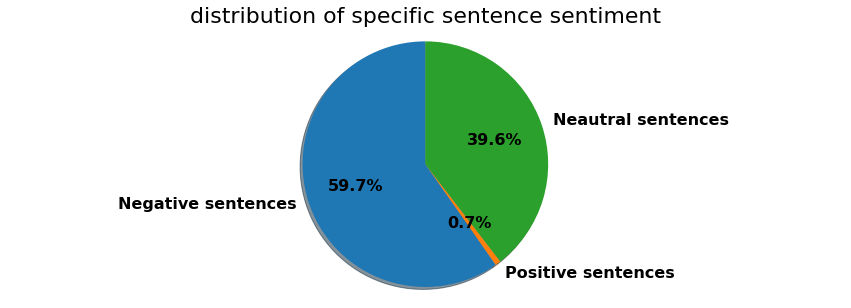

In [22]:
sentences_with_word(no_vax,no_vax_words)

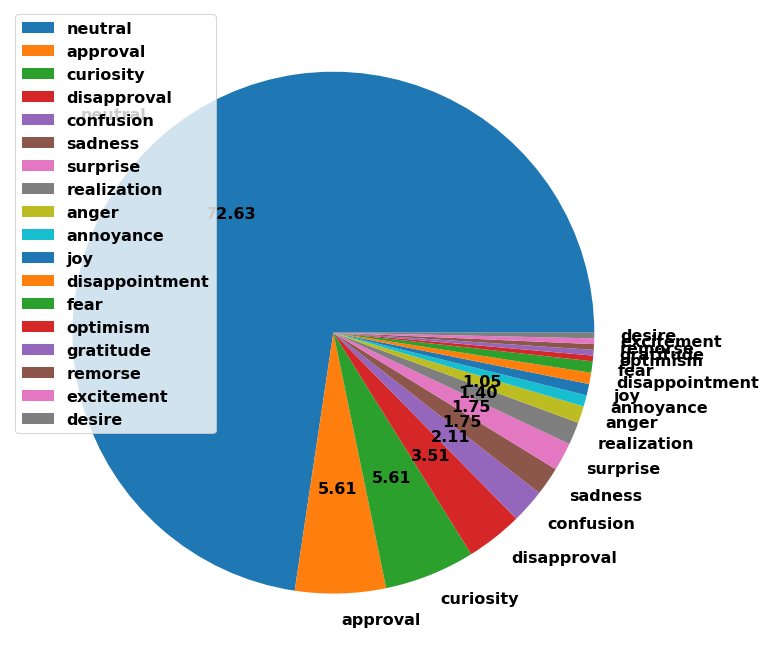

In [16]:
plot_emotions(no_vax)

In [23]:
economy_words="gdp|bank|economy|economist|investment|market"
economy=df_sub[(df_sub['Title_en'].str.contains(economy_words))|(df_sub['Text_en'].str.contains(economy_words))]
len(economy)/len(df_sub)

0.15123922413793103

SAMPLES OF POSITIVE HEADLINES
Sporting events reinvent themselves and resist COVID-19
Pharmaceutical company Pfizer says its COVID-19 vaccine is more than 90% effective
The best images of the week
SAMPLES OF NEGATIVE HEADLINES
Psychological problems arising from the pandemic are more worrying than unemployment in Valencia
It's management, stupid!
Cambra warns that the new wave of covid is cooling the recovery


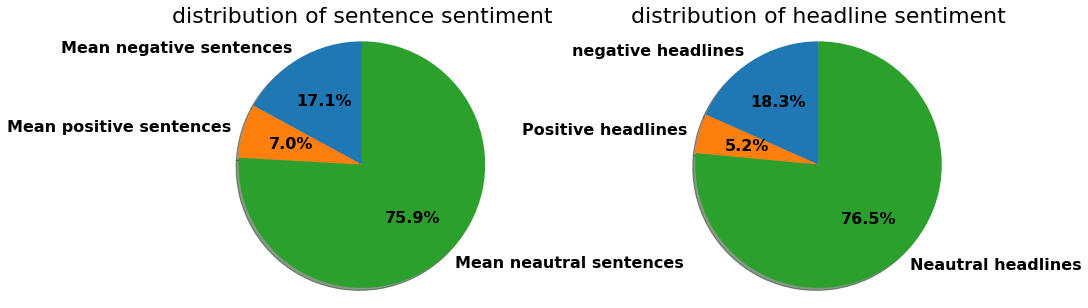

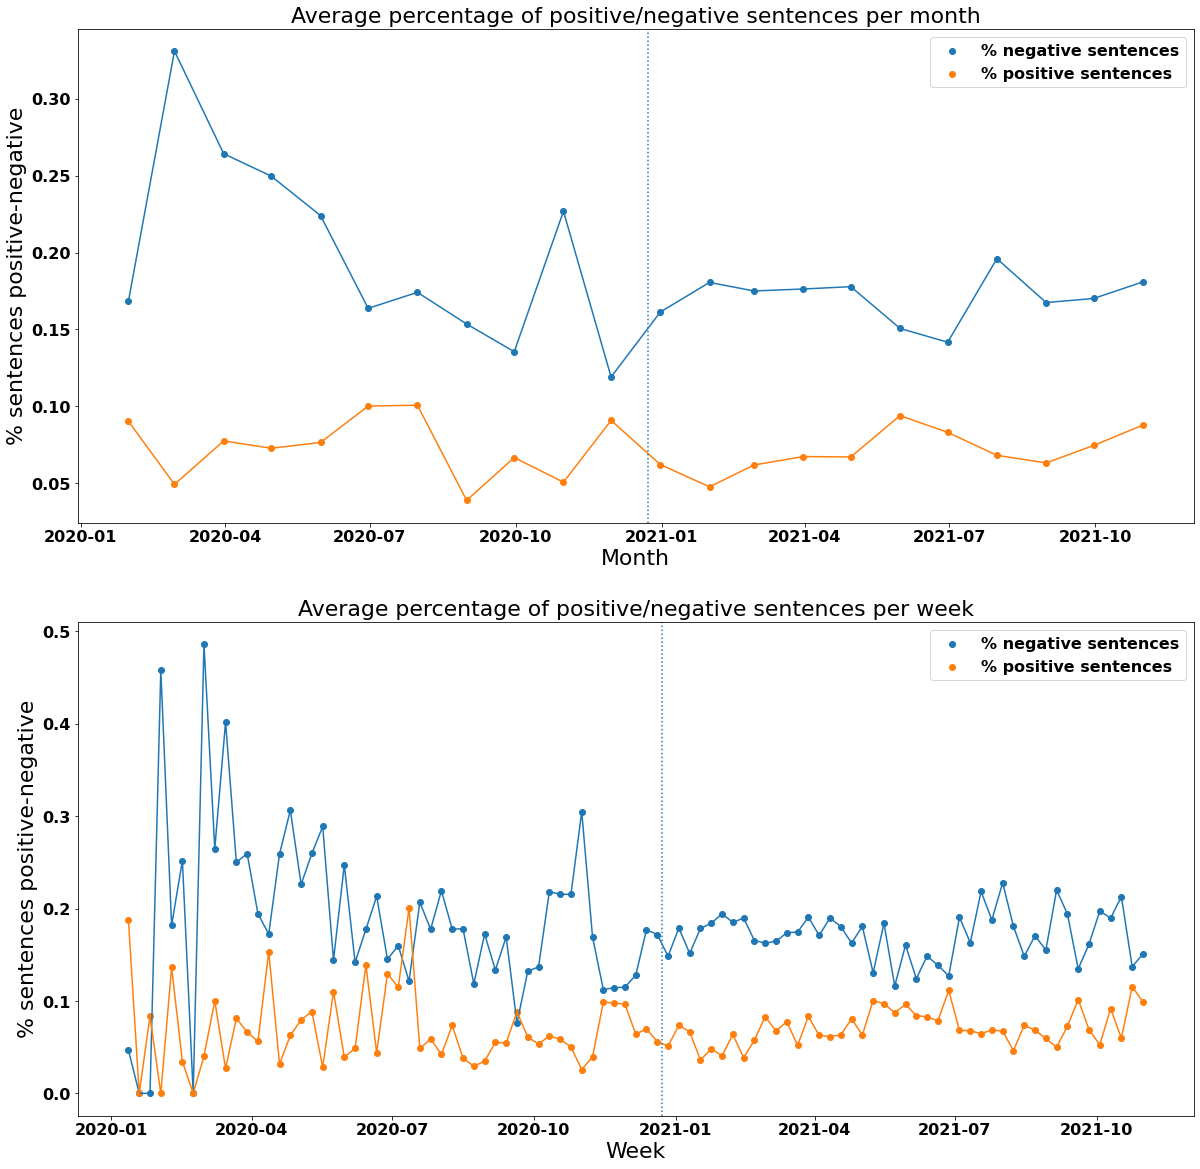

In [24]:
sentiment_analysis(economy,'2020-12-23')

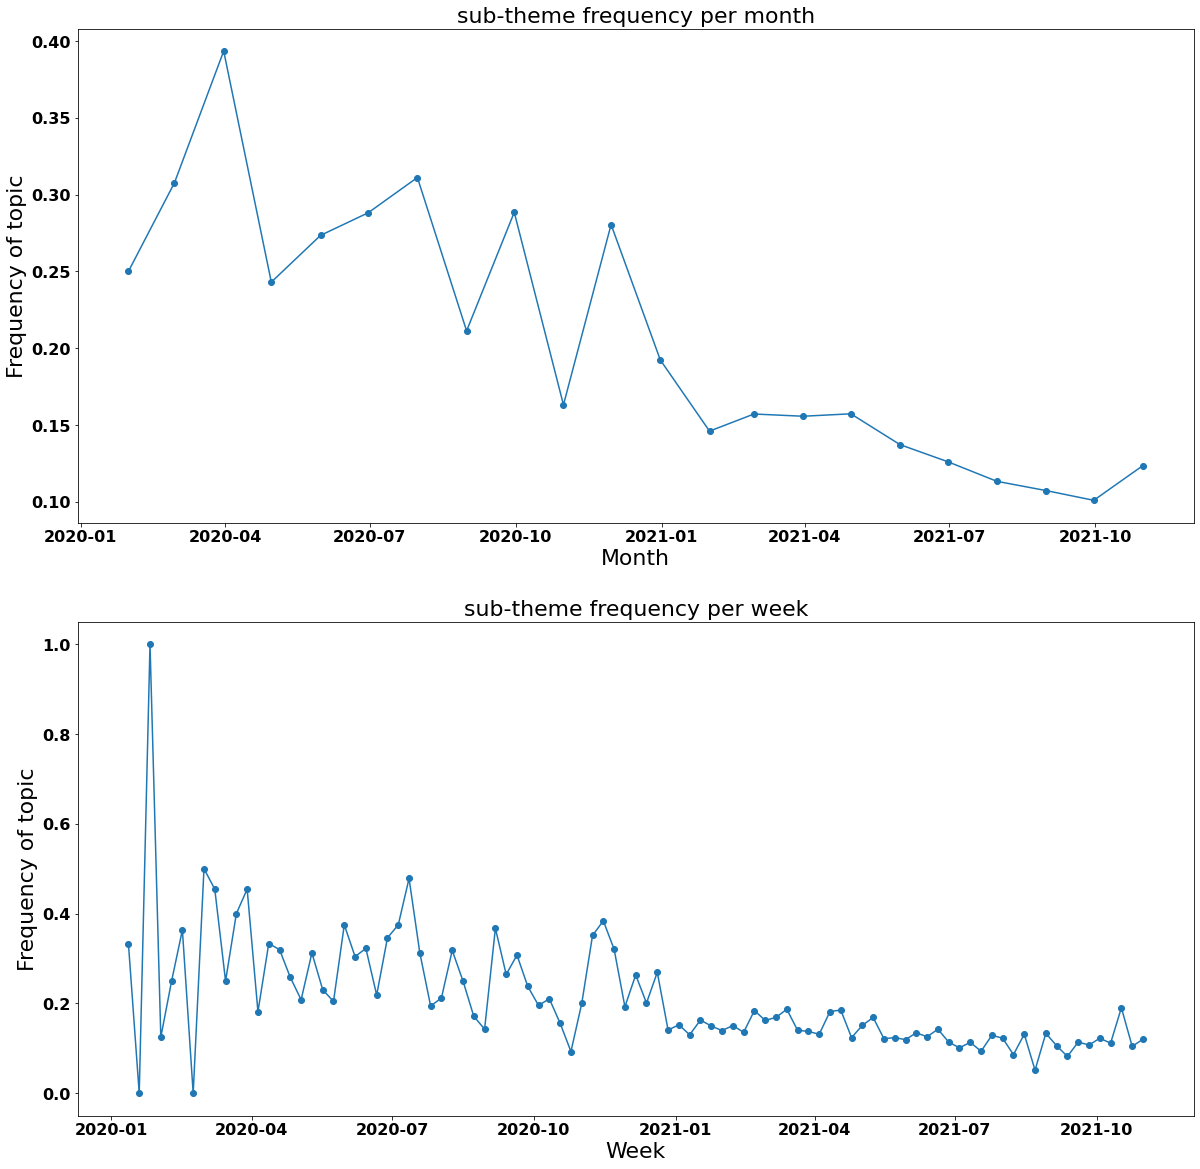

In [25]:
frequency_topics(df_sub, economy)

SAMPLES OF POSITIVE SENTENCES
This Monday, the pharmaceutical company Pfizerassured that its vaccine has an efficacy of more than 90% 7 days after receiving the second dose -which boosted the European stock markets, including the IBEX-.
Looking forward, I think we can still reduce the time in the regulatory process [at the European Medicines Agency] to approve vaccines on the market.
SAMPLES OF NEGATIVE SENTENCES
He acknowledged that covid-19 continues to take a heavy toll on fiscal health and the economy as a whole, coupled with the aftermath of Hurricane Dorian.
Political and social tension is growing in Latin America's third largest country, with the economy plummeting to historic levels, crime once again on the rise, and the fact that by the end of 2020, 63% of children will be poor, in a context of general poverty that already exceeds 40% and continues to grow.


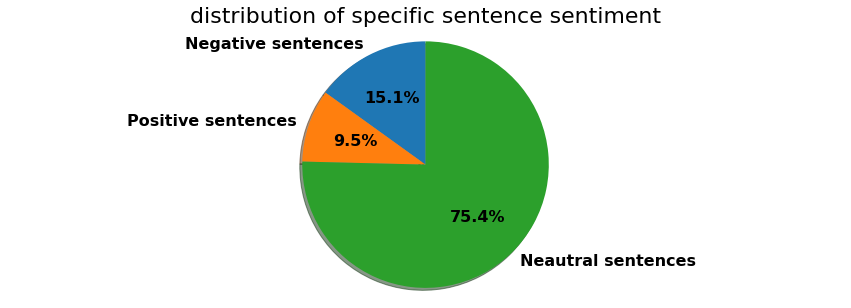

In [26]:
sentences_with_word(economy,economy_words)

In [27]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(economy.list_labels[7]) if x == 2]
for i in indices: 
    print(economy.list_sentences[7][i])

The Regional Minister of Health, Miguel Rodríguez; the President of the CEOE Foundation, Fátima Bánez; and the President of the Confederation of Employers of Cantabria, Enrique Conde, have signed this Thursday a collaboration framework agreement to speed up the development of projects that contribute to the control of the pandemic.
In the same vein, Báñez thanked the "sensitivity" of the regional government in favour of public-private collaboration, and CEOE Cantabria, which "has believed from the beginning" in this project to overcome the crisis of Covid "with the commitment of all".
"Health plus economy is at the heart of this great agreement that we are signing today" because "people have to be at the centre of this recovery after the pandemic and they also have to be fundamental in the recovery from the economic crisis", he asserted.
"We are here to accompany and support the management of the Administration, and in this aspect it is important to highlight the work of the business c

In [28]:
education_words="education|pupil|classroom|student|school"
education=df_sub[(df_sub['Title_en'].str.contains(education_words))|(df_sub['Text_en'].str.contains(education_words))]
len(education)/len(df_sub)

0.13254310344827586

SAMPLES OF POSITIVE HEADLINES
Solidarity, effort and commitment are the stars of COPE Valencia's evening programme
Díaz Ayuso's pandemic leaflets: "I am here to save lives... Paste: 994 million".
One of the Seville teachers vaccinated with 6 doses of Pfizer vaccine says he is "practically perfect".
SAMPLES OF NEGATIVE HEADLINES
Weakened T-cells, a possible cause of inflammatory syndrome following Covid-19 in children
We are going to be caught by the bull
Melissa Joan Hart and her disturbing video: "I have covid, I'm vaccinated and I'm sick, this is not good".


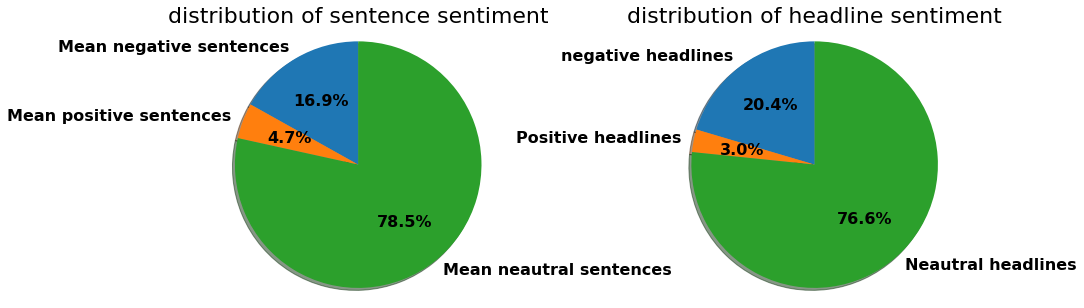

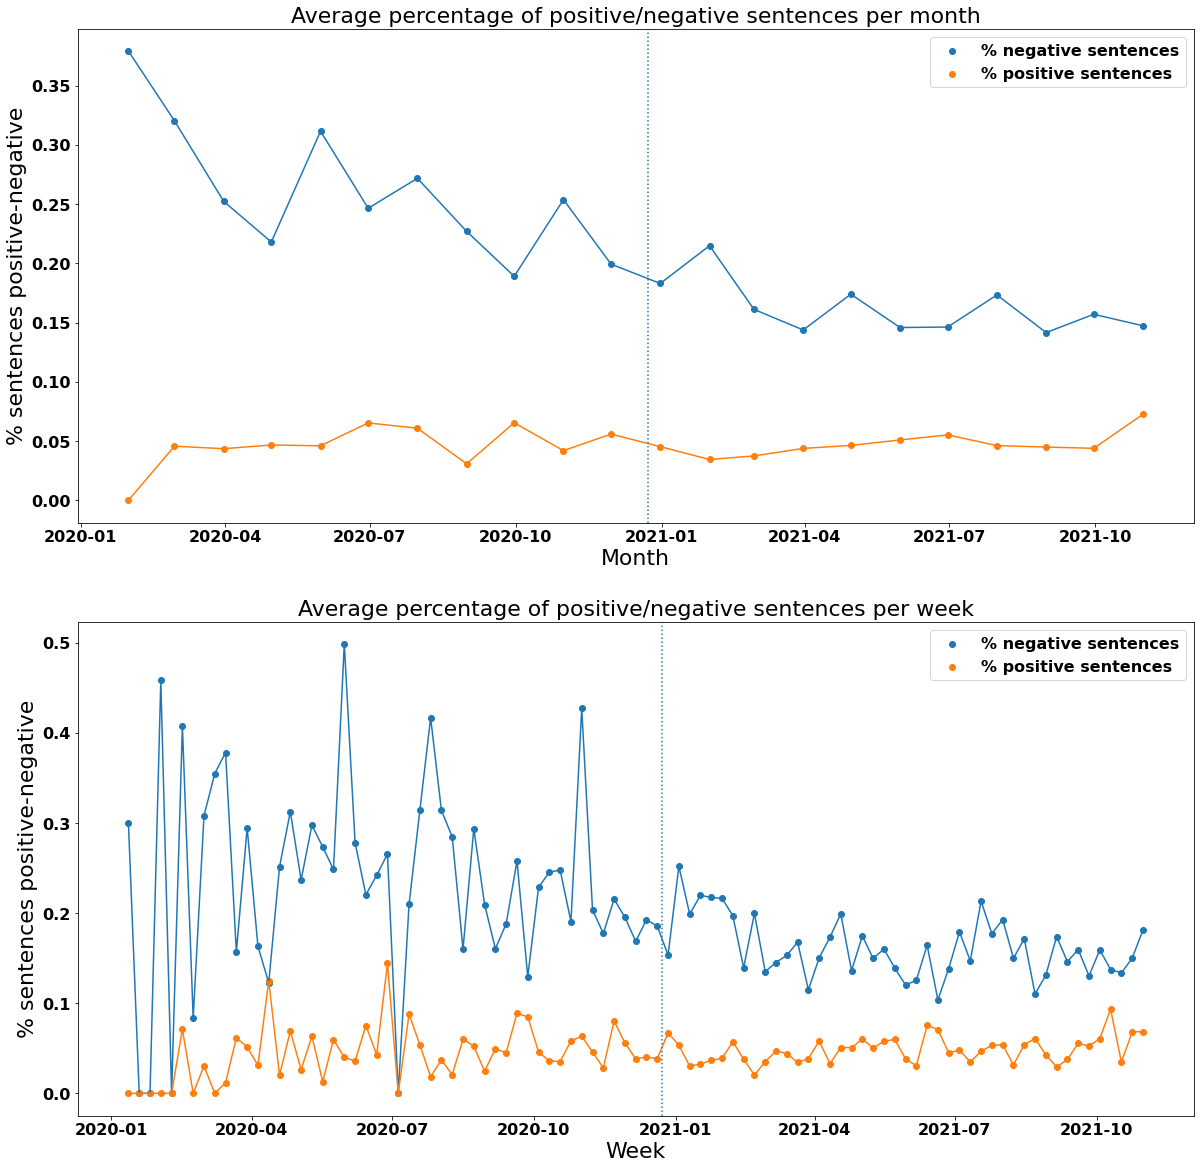

In [29]:
sentiment_analysis(education,'2020-12-23')

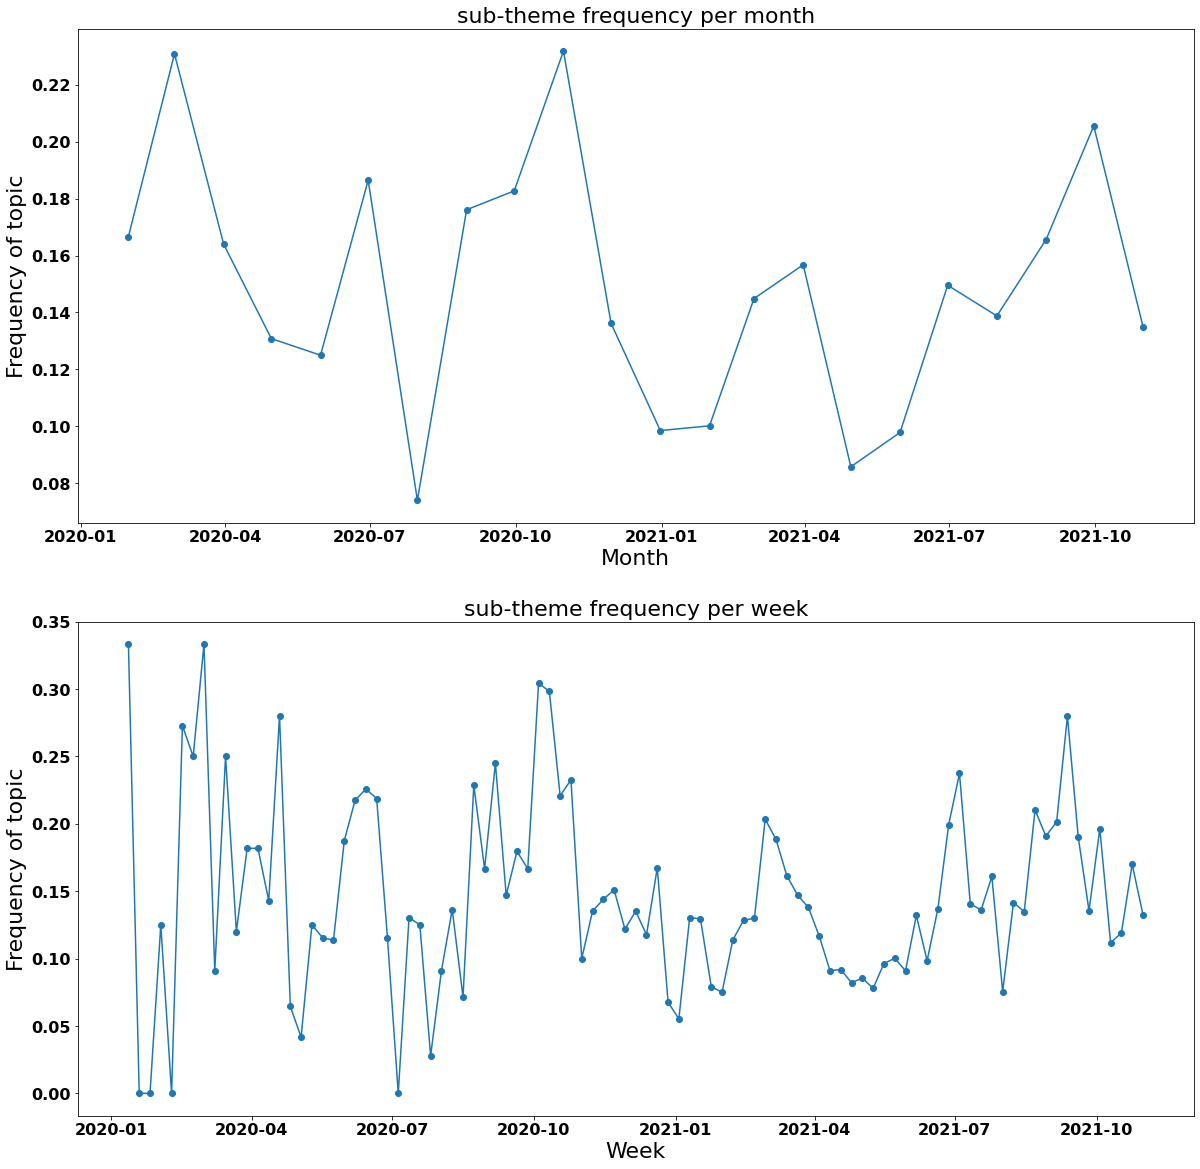

In [30]:
frequency_topics(df_sub, education)

SAMPLES OF POSITIVE SENTENCES
For a year now, we at FAMPA have been clearly in favour of returning to schools with all the health safety measures established by the experts and, despite the tension of the second term due to the increase in cases after Christmas, we have a positive balance of the 2020-2021 academic year.
On the other hand, the "successful" vaccination campaign against Covid-19 will allow "flexibility" in the distance between students from 1.5 metres to 1.2 metres under favourable health conditions.
SAMPLES OF NEGATIVE SENTENCES
"This is the way to guarantee an even safer start to the school year," said Comesaña.
American universities always require students who do not have English as their mother tongue to prove their level of English in order to be able to attend classes.


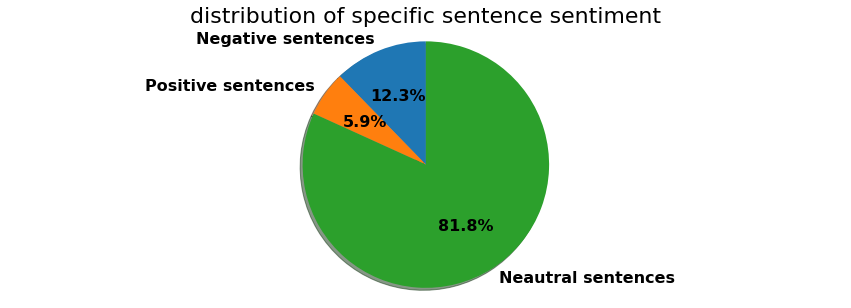

In [31]:
sentences_with_word(education,education_words)

In [32]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(education.list_labels[18751]) if x == 2]
for i in indices: 
    print(education.list_sentences[18751][i])

In a video released on Wednesday, he said that "getting vaccinated, with vaccines authorised by the competent authorities, is an act of love", as it also protects the health and lives of others by stopping contagions.


SAMPLES OF POSITIVE HEADLINES
The Generalitat Valenciana gives its highest award to vaccination teams
Wimbledon excitement as Covid-19 vaccine co-creator Sarah Gilbert gets a standing ovation
The EOC is committed to vaccinating Spanish athletes travelling to Tokyo: May, a key month
SAMPLES OF NEGATIVE HEADLINES
Japan recalls another million doses of Moderna vaccine due to risk of contamination
Express vaccination that comes too late
Towards the strangest Games in history


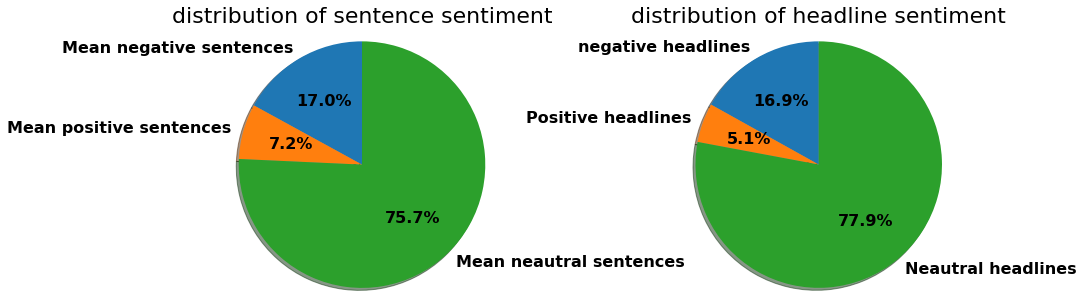

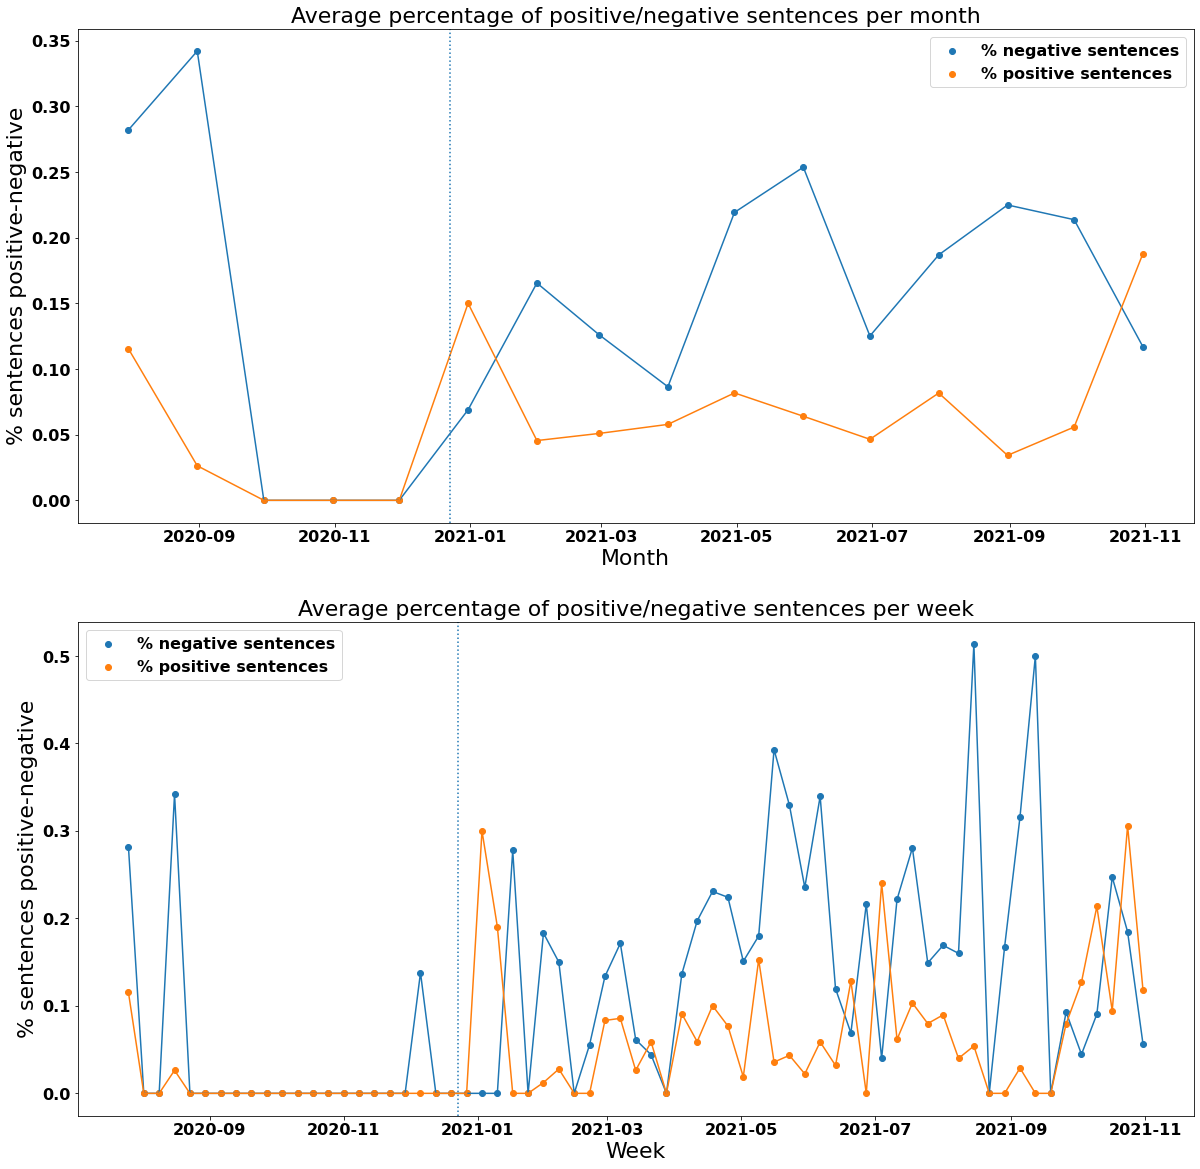

0.007327586206896552

In [33]:
olympics_words="Olympics|Olympic Games|Tokyo"
olympics=df_sub[(df_sub['Title_en'].str.contains(olympics_words))|(df_sub['Text_en'].str.contains(olympics_words))]
sentiment_analysis(olympics,'2020-12-23')
len(olympics)/len(df_sub)

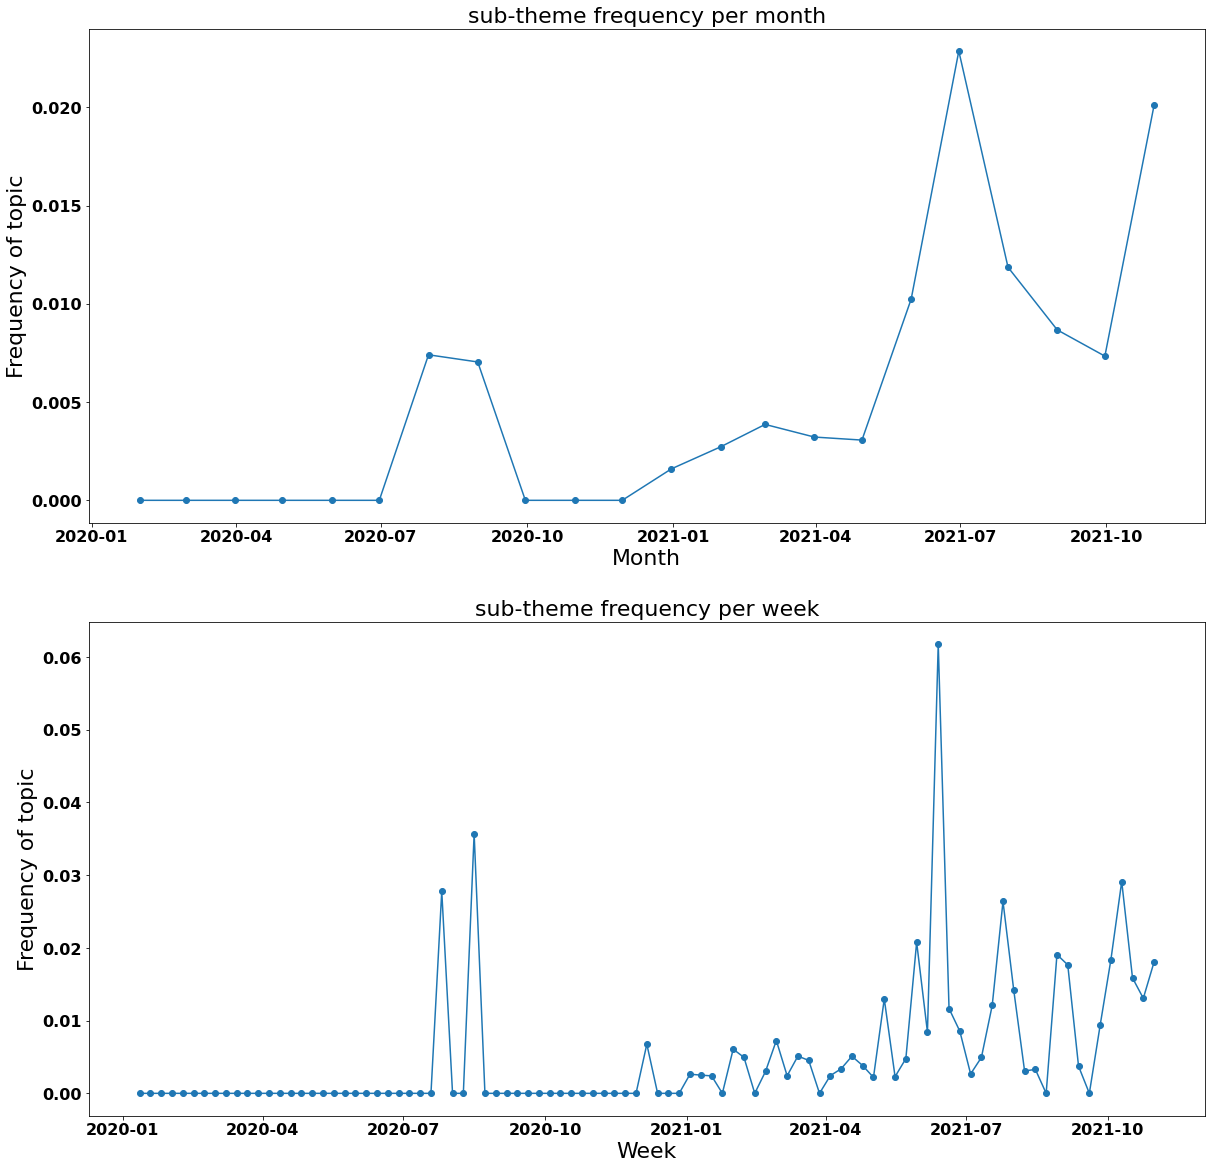

In [34]:
frequency_topics(df_sub,olympics)

SAMPLES OF POSITIVE SENTENCES
 If there is a city that knows how to rise from the ashes, it is Tokyo.
Tokyoites, like the rest of the world, will be celebrating the sporting event at home, because viewing in public parks will not be possible either.
SAMPLES OF NEGATIVE SENTENCES
On Thursday, advisers to the Tokyo metropolitan government warned that people were moving around more after the government lifted a state of emergency in the capital and elsewhere this week, and that could cause an increase in infections.
The surge is beginning to strain the medical system, with 64% of Tokyo's hospital beds available for severe cases of covid-19 already occupied as of Wednesday.


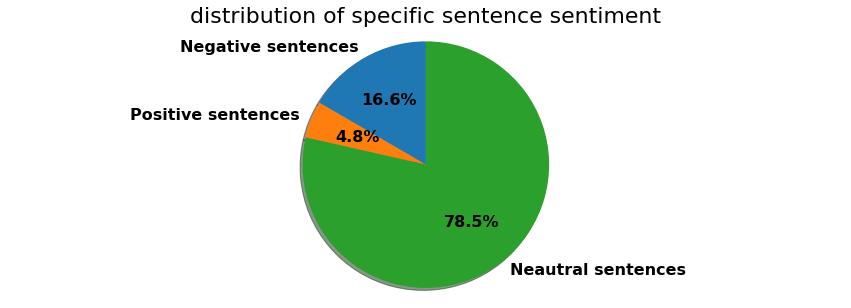

In [35]:
sentences_with_word(olympics,olympics_words)

In [36]:
olympics

Title_en  \
704    Experts recreate how you get covid by wearing ...   
717    US advises against travel to Japan two months ...   
928    Military trackers in the Canary Islands are in...   
1388   Japan blocks more contaminated Moderna vaccine...   
1411   Defence starts issuing Covid passports and com...   
...                                                  ...   
18033  Chronic patients lament being "invisible" in v...   
18168  Busquets' positive test precipitates vaccinati...   
18197  The government will authorise the vaccination ...   
18548  Don Felipe: "The inhabitants of La Palma have ...   
18631  The six news items you need to know today, Tue...   

                                                 Text_en        Authors  \
704    A simple conversation between two people in cl...      20minutos   
717    The US government on Monday advised against tr...            EFE   
928    Tomorrow, Wednesday, marks ten months since th...         20M EP   
1388   The Okinawa region of southwestern Japan has a...            EFE   
1411   The Ministry of Defence will also issue the so...    Clara Pinar   
...                                                  ...            ...   
18033  The Platform of Patients' Organisations (POP) ...            ABC   
18168  The commotion caused by Sergio Busquets' posit...            ABC   
18197  The uproar in the Spanish national team follow...  Javier Asprón   
18548  When we presented our Awards last year, Spain ...            NaN   
18631  [If you missed yesterday's six news items, you...            NaN   

             Date                                               Link  \
704    2021-02-24  https://www.20minutos.es/noticia/4596964/0/est...   
717    2021-05-25  https://www.20minutos.es/noticia/4707394/0/est...   
928    2021-07-27  https://www.20minutos.es/noticia/4776839/0/los...   
1388   2021-08-29  https://www.20minutos.es/noticia/4804012/0/jap...   
1411   2021-06-14  https://www.20minutos.es/noticia/4727048/0/def...   
...           ...                                                ...   
18033  2021-06-09  https://www.abc.es/sociedad/abci-pacientes-cro...   
18168  2021-06-07  https://www.abc.es/deportes/futbol/eurocopa/ab...   
18197  2021-06-07  https://www.abc.es/deportes/futbol/eurocopa/ab...   
18548  2021-10-22  https://www.abc.es/cultura/abci-felipe-habitan...   
18631  2021-07-20  https://www.abc.es/espana/noticias-ultima-hora...   

       Newspaper sentiment_title  \
704    20minutos         Neutral   
717    20minutos         Neutral   
928    20minutos         Neutral   
1388   20minutos        Negative   
1411   20minutos         Neutral   
...          ...             ...   
18033        ABC        Negative   
18168        ABC         Neutral   
18197        ABC         Neutral   
18548        ABC        Positive   
18631        ABC         Neutral   

                                          list_sentences  \
704    [A simple conversation between two people in c...   
717    [The US government on Monday advised against t...   
928    [Tomorrow, Wednesday, marks ten months since t...   
1388   [The Okinawa region of southwestern Japan has ...   
1411   [The Ministry of Defence will also issue the s...   
...                                                  ...   
18033  [The Platform of Patients' Organisations (POP)...   
18168  [The commotion caused by Sergio Busquets' posi...   
18197  [The uproar in the Spanish national team follo...   
18548  [When we presented our Awards last year, Spain...   
18631  [[If you missed yesterday's six news items, yo...   

                                             list_labels  porcentage_positive  \
704    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...             0.000000   
717                                [1, 1, 1, 0, 0, 1, 1]             0.000000   
928                                [1, 1, 1, 1, 1, 1, 1]             0.000000   
1388                   [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]             0.000000   
14

In [37]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(olympics.list_labels[1411]) if x == 0]
for i in indices: 
    print(olympics.list_sentences[1411][i])

But they have now been joined by the Ministry of Defence, which will issue the certificates to members of the Armed Forces, who have been charged with vaccinating their military health personnel.
Not the one that includes the negative results of a PCR or antigen test carried out 48 hours before the trip.


## COUNTRIES

In [38]:
usa_words="United States|US|Biden|Trump"
usa=df_sub[(df_sub['Title_en'].str.contains(usa_words))|(df_sub['Text_en'].str.contains(usa_words))]

In [39]:
len(usa)/len(df_sub)

0.18227370689655173

SAMPLES OF POSITIVE HEADLINES
AstraZeneca's Covid-19 vaccine shows efficacy of at least 70%.
Godzilla vs Kong', the film that resuscitates the world box office
The Global Alliance for Vaccines wins the Princess of Asturias Award for Cooperation 2020
SAMPLES OF NEGATIVE HEADLINES
United States continues with mass drive-by vaccinations
Most unpredictable flu season begins with Covid still active
California shuts down much of its economy again as Covid-19 resurfaces


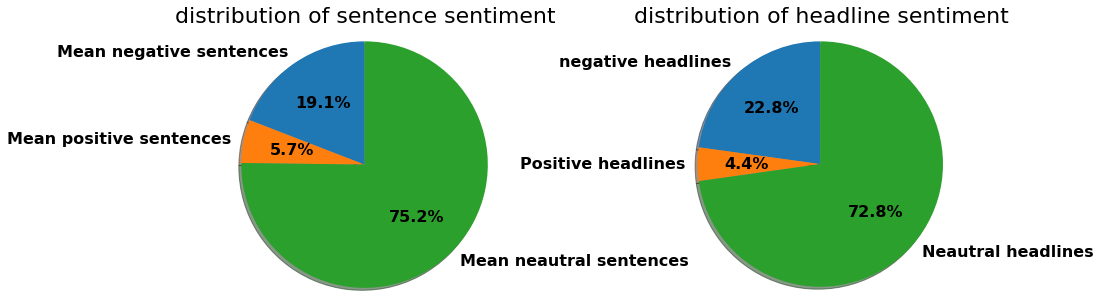

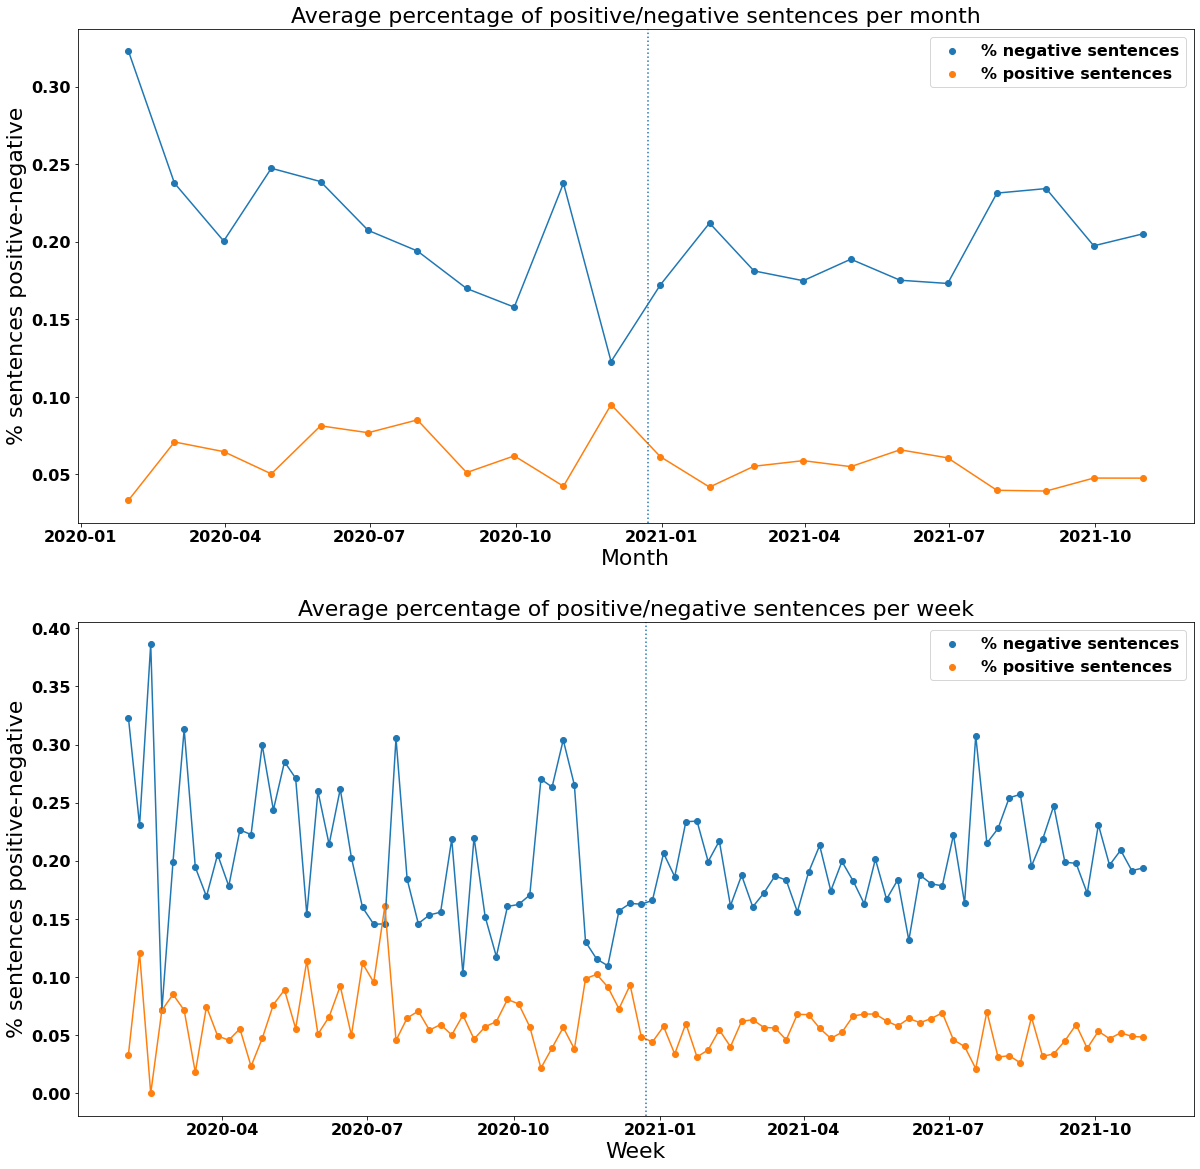

In [40]:
sentiment_analysis(usa,'2020-12-23')

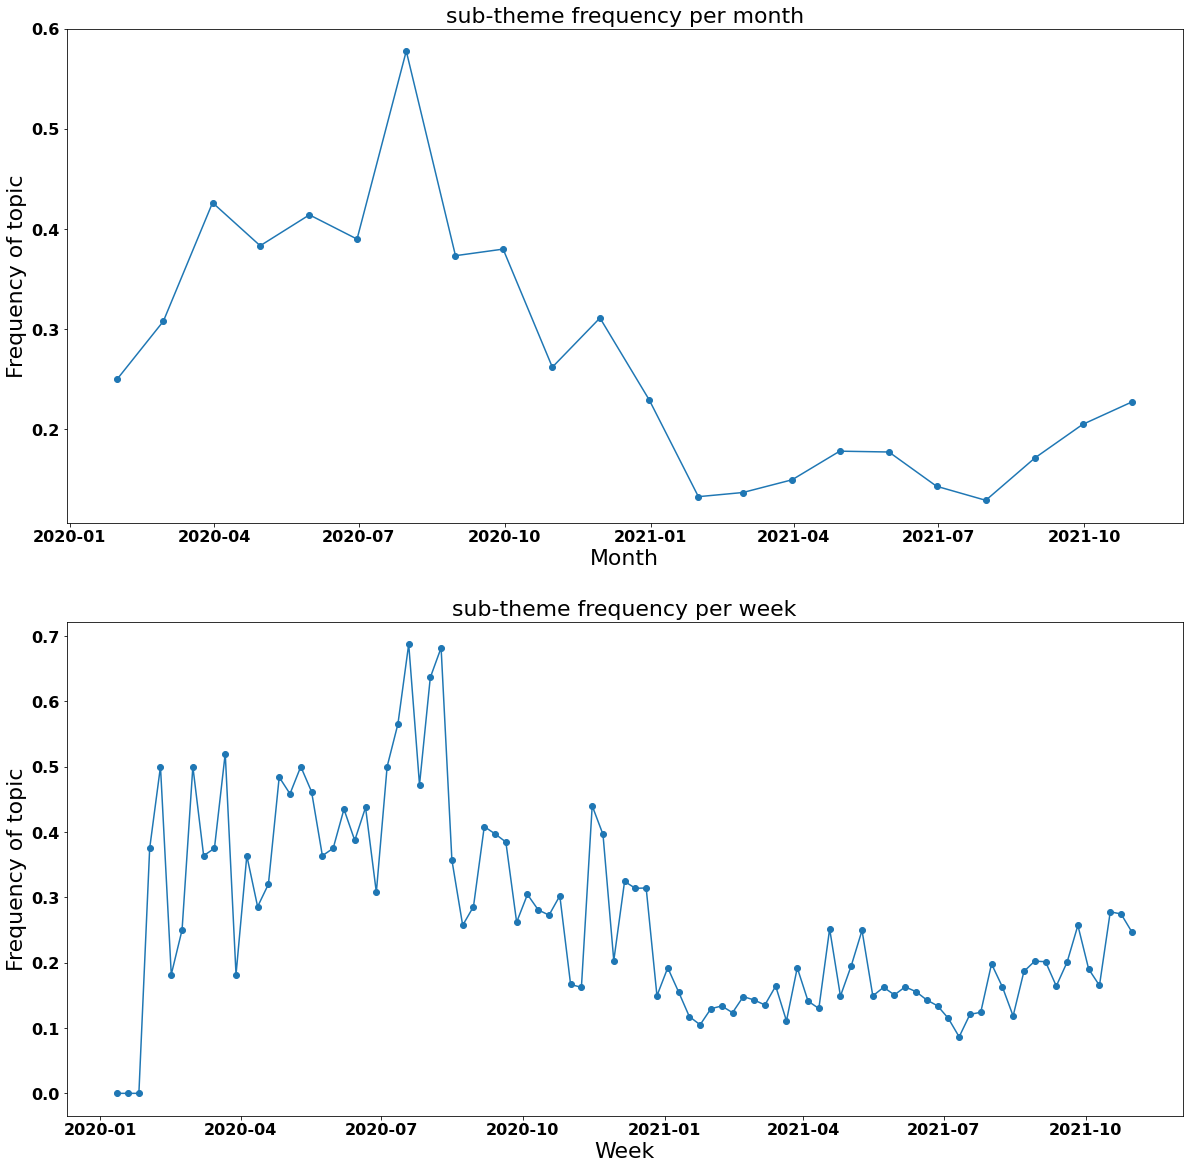

In [41]:
frequency_topics(df_sub,usa)

SAMPLES OF POSITIVE SENTENCES
The stock index that has risen the most over the last twelve months is the US technology index, the Nasdaq, with a cumulative return of 53%.
The United States is closer to allowing the use of Pfizer's Covid-19 vaccine for children aged five to 11, a decisive step toward ending the pandemic in the world's leading power.
SAMPLES OF NEGATIVE SENTENCES
Following US Vice President Kamala Harris' visit to Guatemala and Mexico this week, there is a growing sense among Central American migrant support groups in Guatemala, Mexico and the US that Joe Biden's administration does not have a substantially different policy than Barack Obama's and Donald Trump's to address the root causes of the migration problem: the violence, extreme poverty and corruption that characterise the three migrant-sending countries.
In the mid-1960s, a rubella epidemic in the United States caused tens of thousands of miscarriages, stillbirths and births with congenital defects.


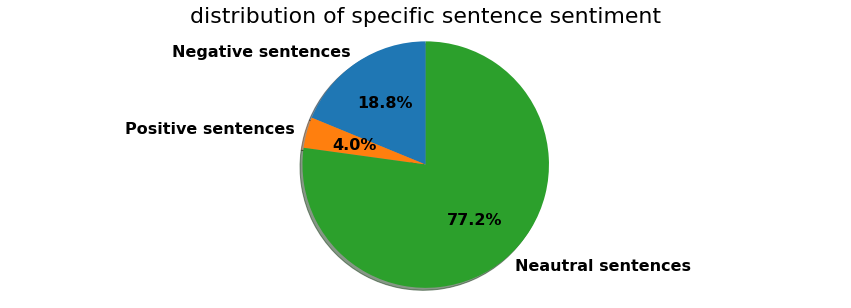

In [42]:
sentences_with_word(usa,usa_words)

In [43]:
russia_words="Russia|Moscow|Putin"
russia=df_sub[(df_sub['Title_en'].str.contains(russia_words))|(df_sub['Text_en'].str.contains(russia_words))]
len(russia)/len(df_sub)

0.04563577586206897

SAMPLES OF POSITIVE HEADLINES
Covax, solidarity in vaccines against Covid-19
This is how the Civil War ended with the best hospital in the history of Spain against epidemics.
Top 8 coronavirus news of the day
SAMPLES OF NEGATIVE HEADLINES
Pandemic recedes
The government admits that the EU is "not up to the task" with vaccines after the regional 'every man for himself'.
World's worst daily death toll from coronaviruses


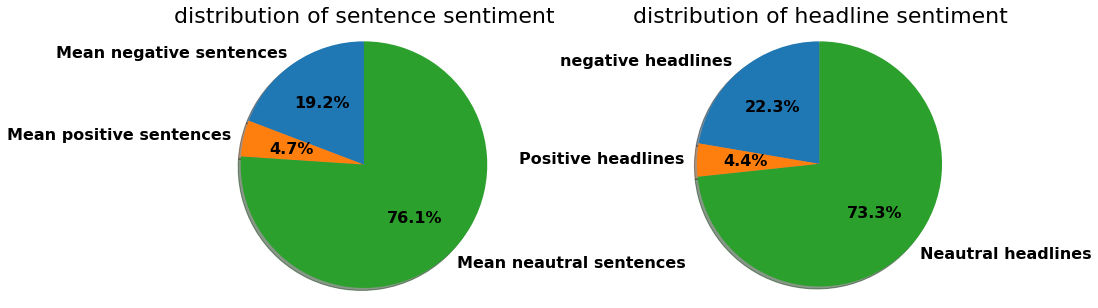

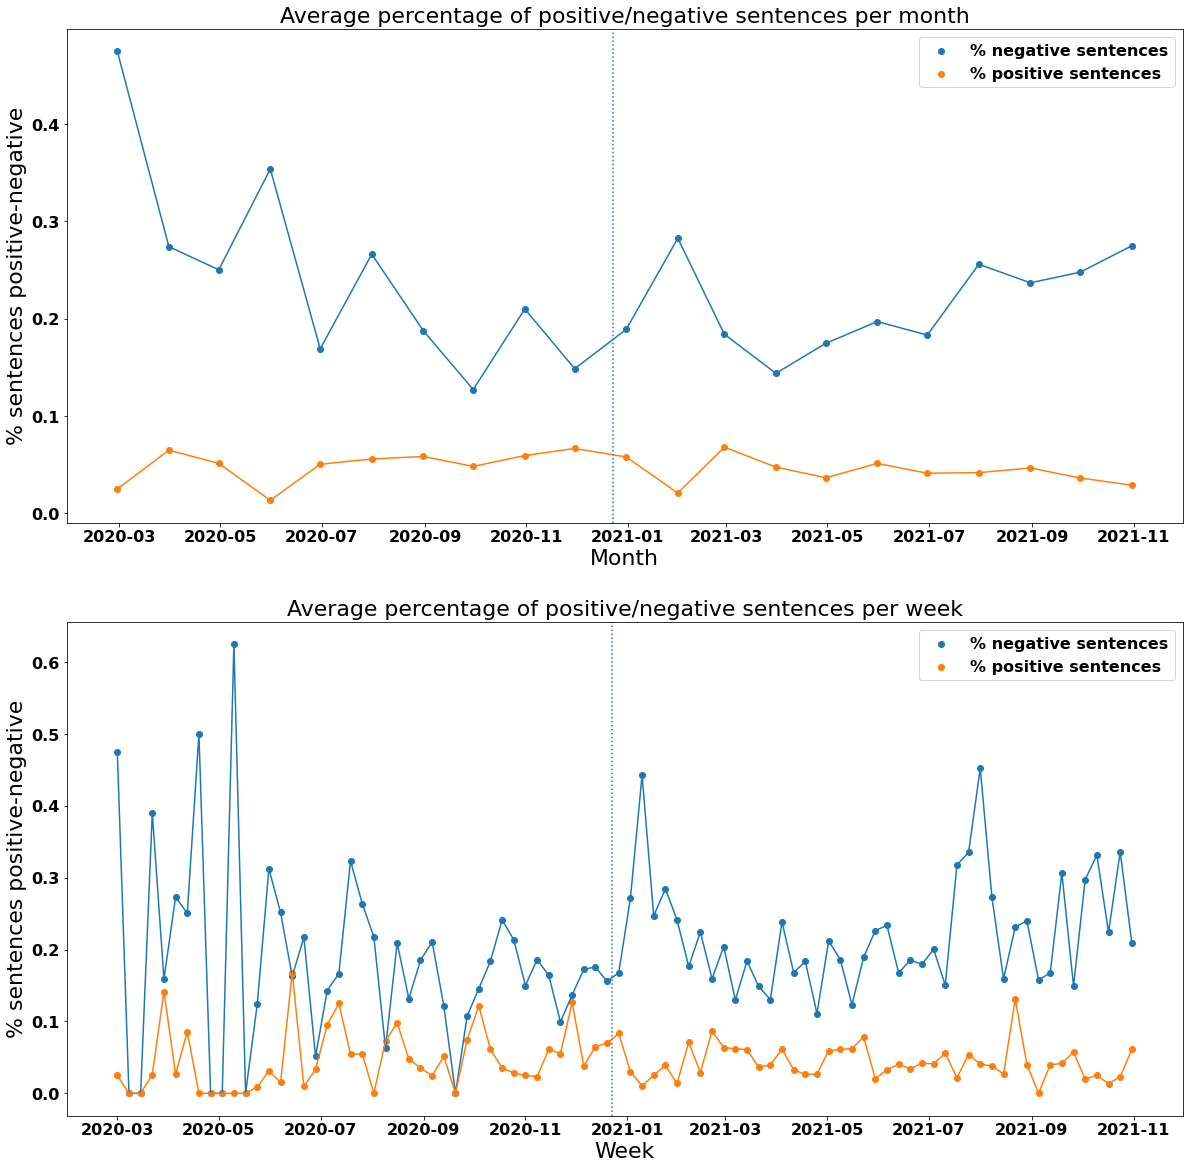

In [44]:
sentiment_analysis(russia,'2020-12-23')

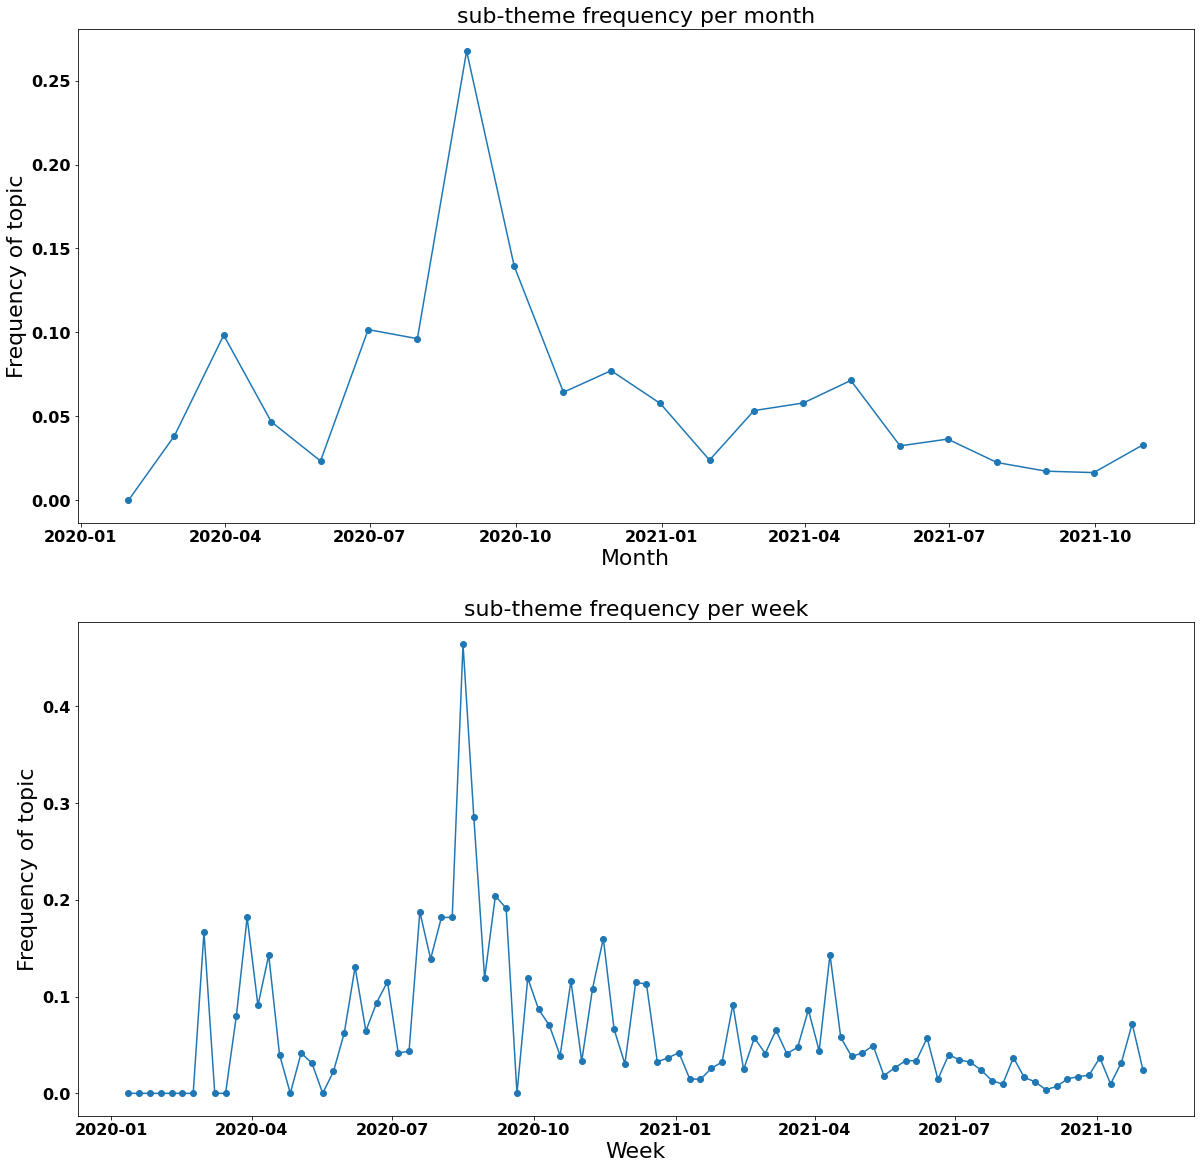

In [45]:
frequency_topics(df_sub,russia)

SAMPLES OF POSITIVE SENTENCES
Duterte was confident of the effectiveness of the vaccine being developed by Russia, which he said would be ready by December, when "the Philippines will be free of COVID-19 and can enjoy a peaceful Christmas".
Europe has the third wave under control, with a clear improvement in all countries, including Russia and Turkey.
SAMPLES OF NEGATIVE SENTENCES
Several of these countries have been targeted by the Russian-driven computer malware campaign, according to the Federation of American Scientists (FAS), a long-standing US research organisation that has been following the case since September.
In Moscow, the country's main epidemic hotspot, 72 deaths and 6,545 infections were reported in the last 24 hours, surpassing the 6,000 mark for the third day in a row.


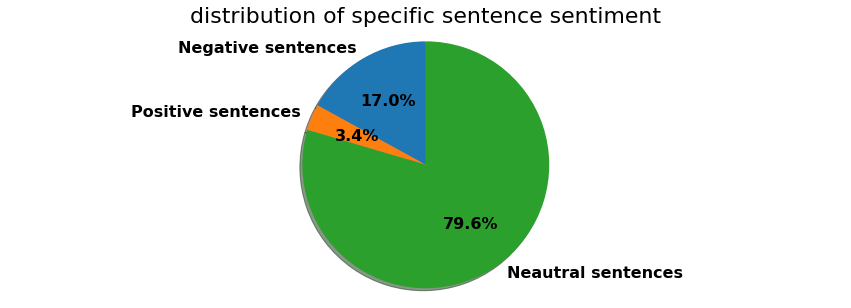

In [46]:
sentences_with_word(russia,russia_words)

In [47]:
india_words="India|Dheli"
india=df_sub[(df_sub['Title_en'].str.contains(india_words))|(df_sub['Text_en'].str.contains(india_words))]
len(india)/len(df_sub)

0.04380387931034483

SAMPLES OF POSITIVE HEADLINES
Pfizer's vaccine against South African variant is 75% effective
Daniel Prieto-Alhambra: "It is very likely that the British variant will end up being dominant in Spain, the key is how fast".
Countries that have best fought the pandemic
SAMPLES OF NEGATIVE HEADLINES
India surpasses 4,000 coronavirus deaths per day
More than 4,000 deaths a day in India, with no breakthrough on vaccines
Joe Biden: a president for a wounded, ailing, divided nation mired in economic crisis


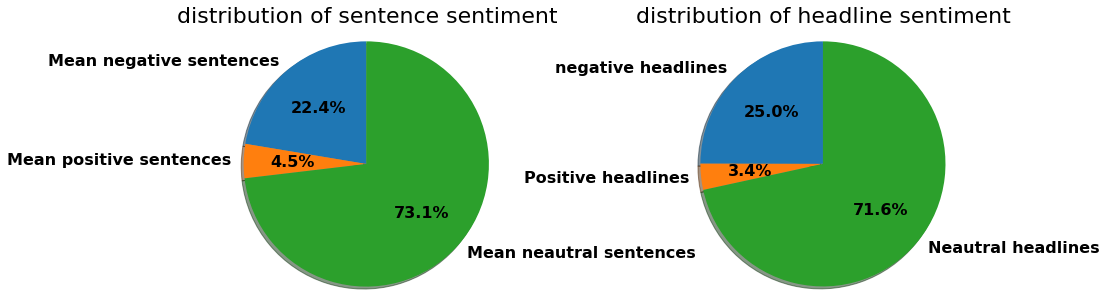

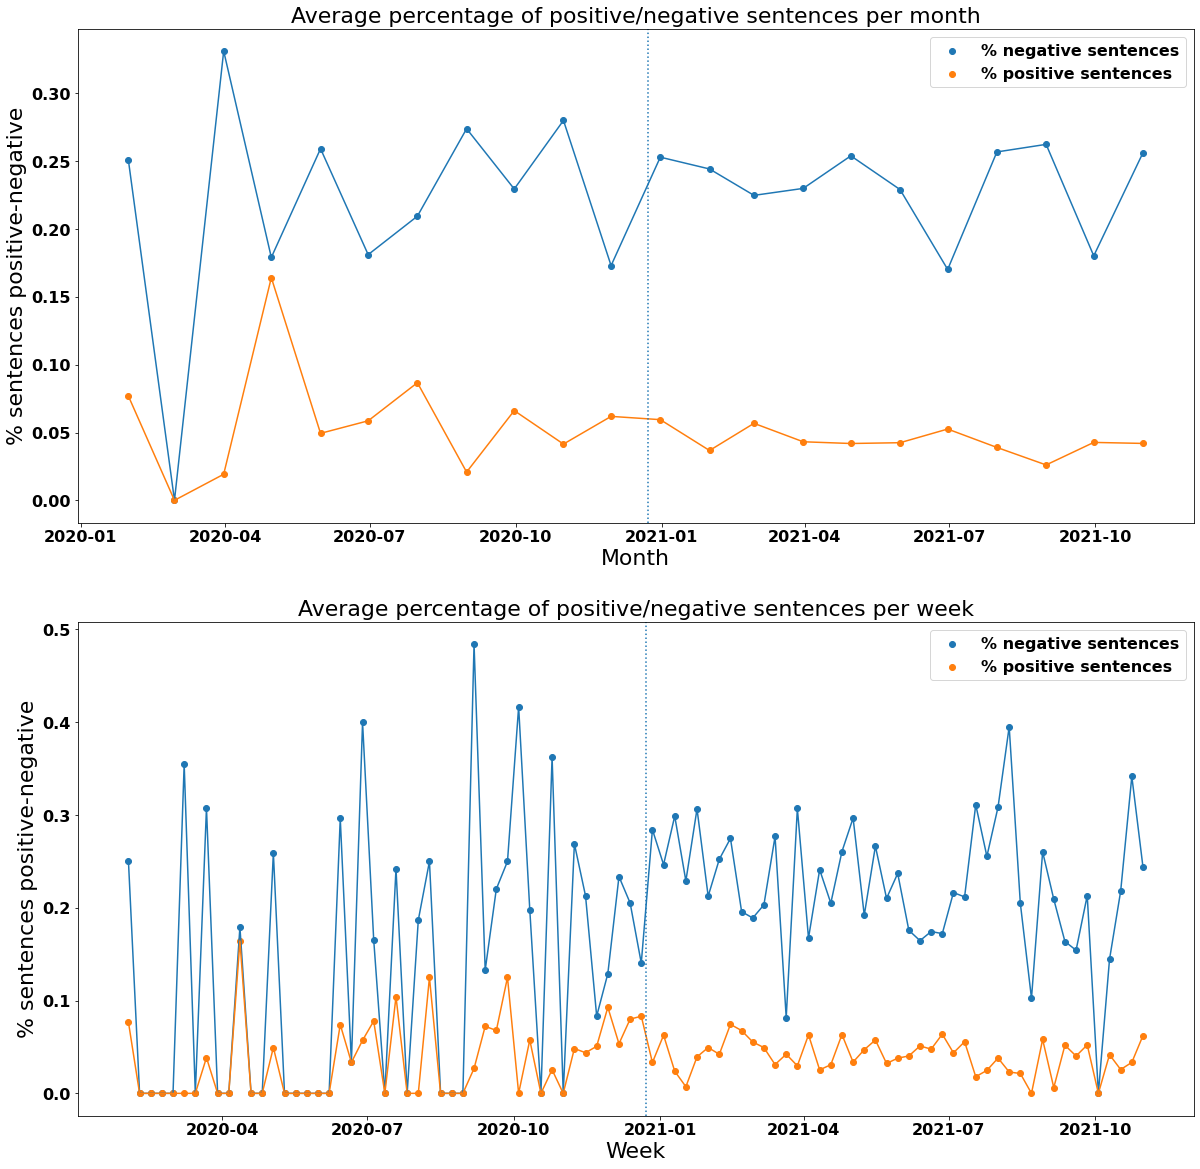

In [48]:
sentiment_analysis(india,'2020-12-23')

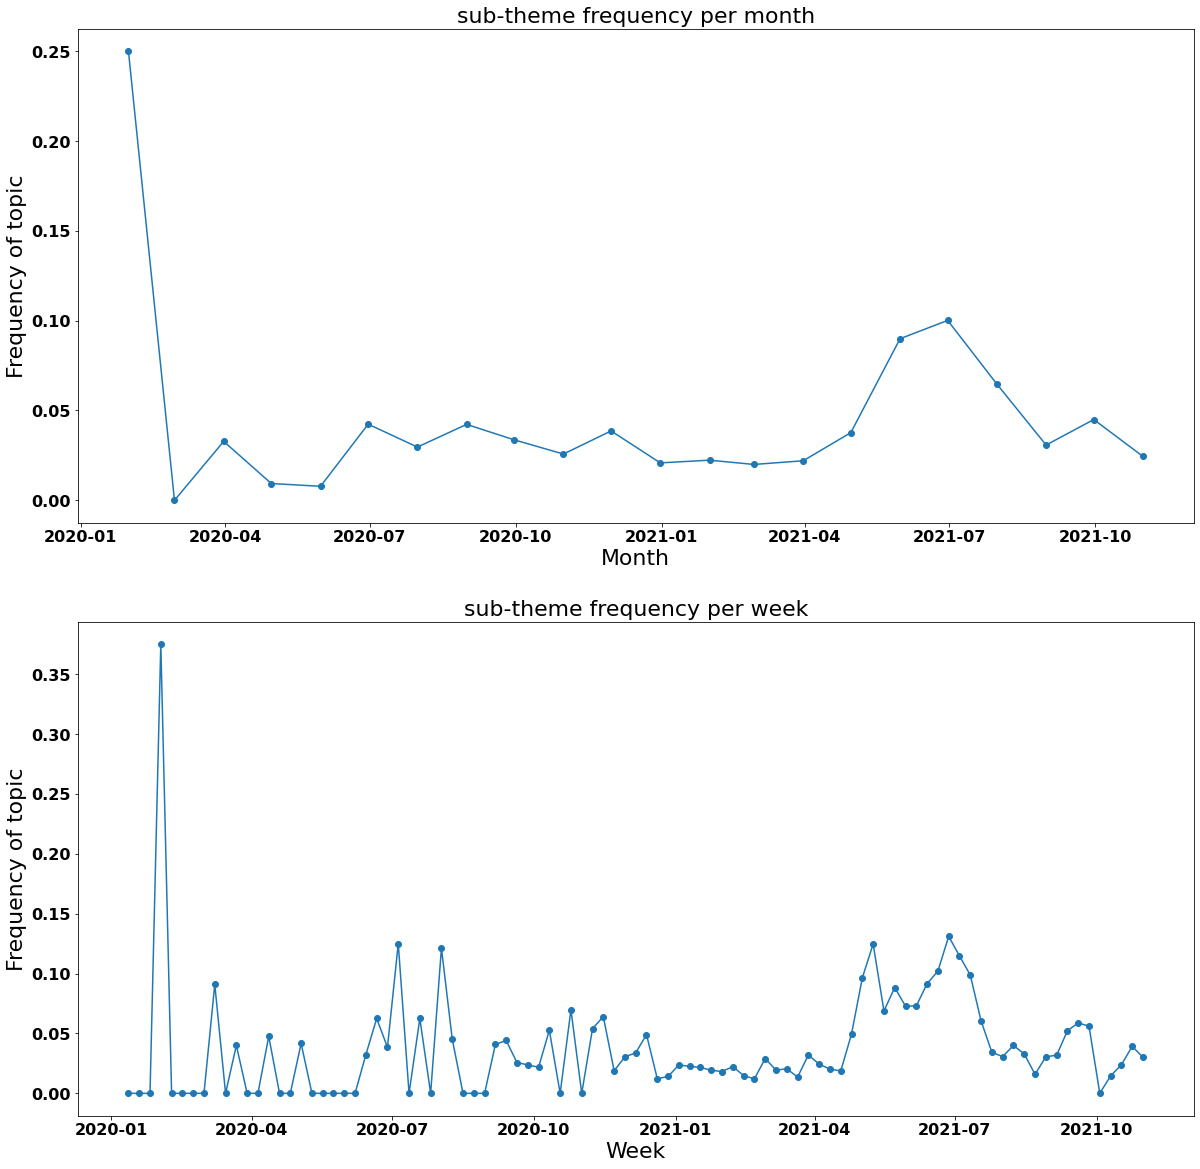

In [49]:
frequency_topics(df_sub,india)

SAMPLES OF POSITIVE SENTENCES
The UK health agency noted that Pfizer's vaccine remains highly effective in preventing hospitalisations caused by the Indian variant, achieving up to 96% protection.
This time, India is confident that its vaccination campaign, which aims to immunise the vulnerable population over the age of 45, will protect as many people as possible from the lethality of the disease.
SAMPLES OF NEGATIVE SENTENCES
The furtive kissing scandal amid the Covid restrictions also comes at the worst possible time, in the midst of a spike caused by the Delta or Indian variant, which has pushed daily cases to over 18,000.
This means that the rate of deaths per capita is much higher in Brazil than in the United States, the country with the most cases and deaths, or India, where inequality, poverty and lack of resources have helped spread the virus.


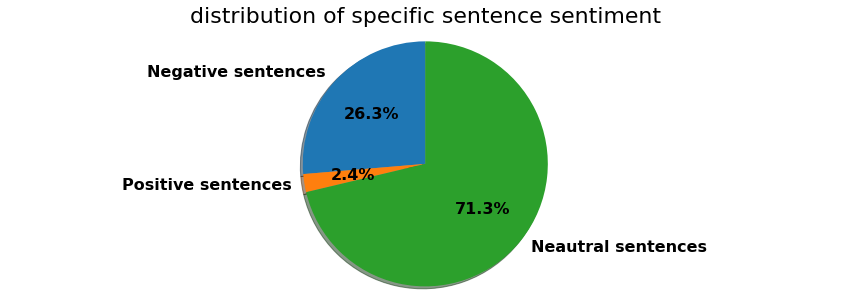

In [50]:
sentences_with_word(india, india_words)

In [17]:
spain_words="Pedro Sánchez|Darias|Illa"
spain=df_sub[(df_sub['Title_en'].str.contains(spain_words))|(df_sub['Text_en'].str.contains(spain_words))]
len(spain)/len(df_sub)

0.13550646551724138

SAMPLES OF POSITIVE HEADLINES
The miracle of the vaccine: Spain, world leader one year after Illa's almost unbelievable announcement
The wonder of sailing again
Darias applauds Bioethics' statement on AstraZeneca: "Vaccination is going swimmingly".
SAMPLES OF NEGATIVE HEADLINES
When the second dose of the vaccine doesn't arrive on the scheduled day: "The more weeks that pass... the more risk there is... the more risk there is".
Telemadrid denounces the security breach in the Covid certificate portal to the Public Prosecutor's Office.
A month of skyrocketing youth infections: from non-stigmatisation to club closures and curfews for young people


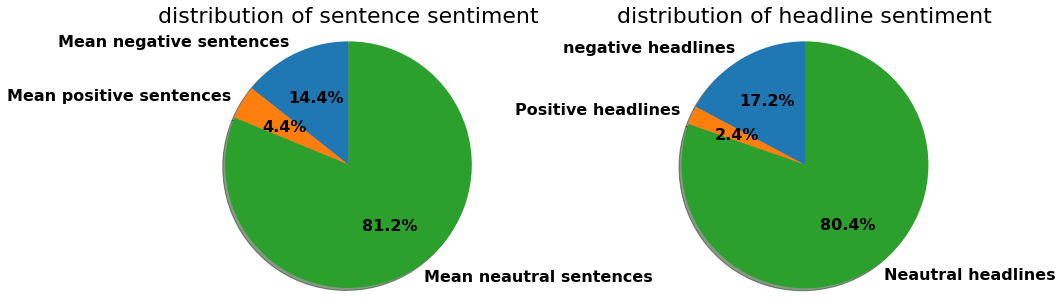

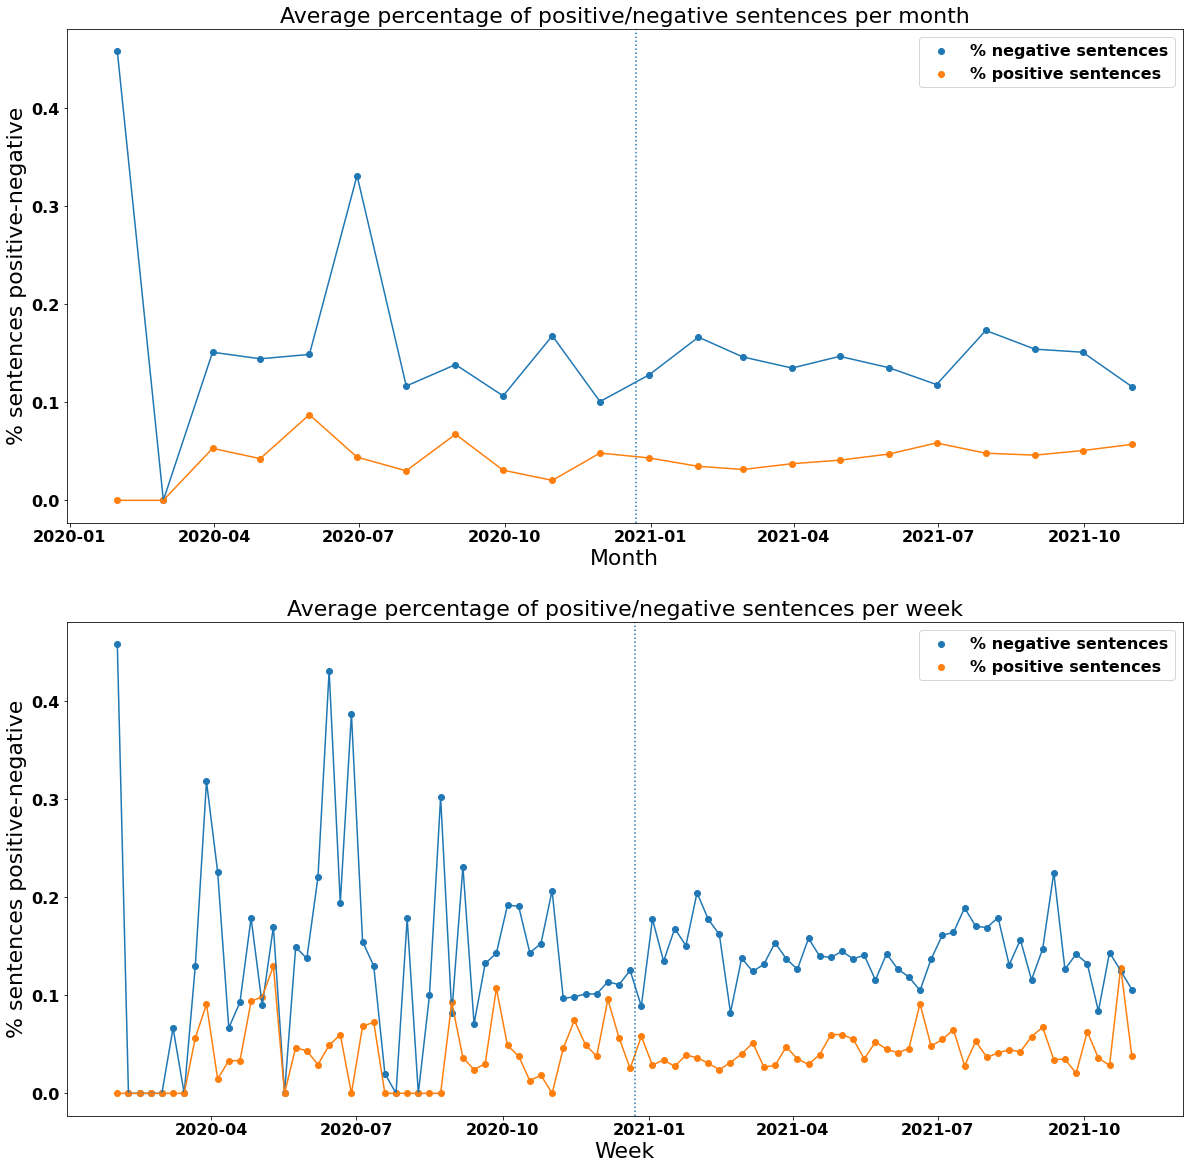

In [18]:
sentiment_analysis(spain,'2020-12-23')

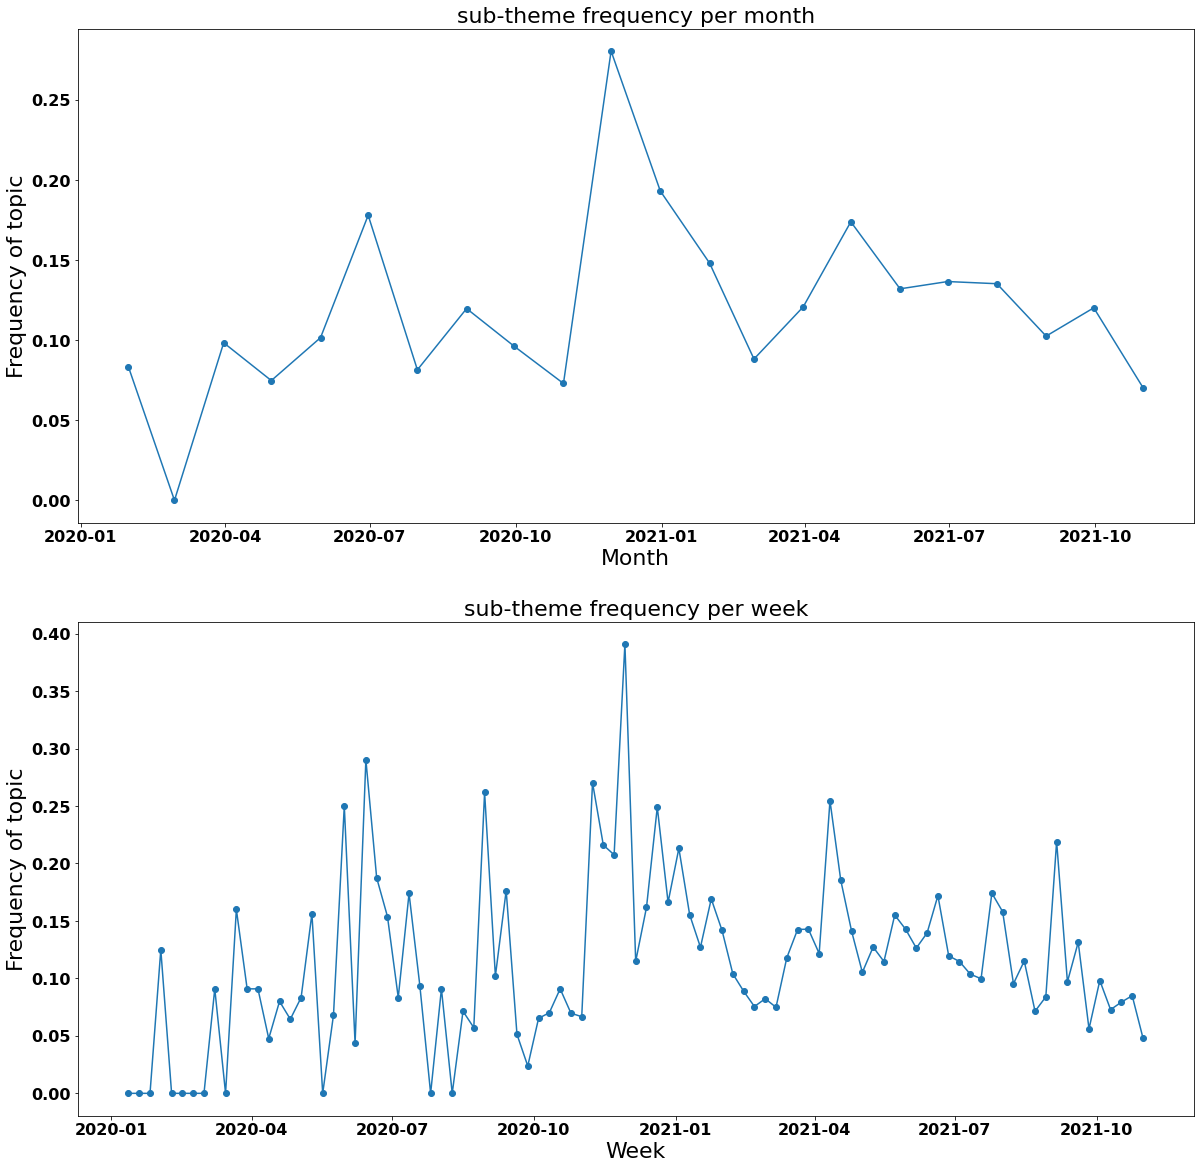

In [19]:
frequency_topics(df_sub,spain)

SAMPLES OF POSITIVE SENTENCES
"We have spent more than 4,000 million on vaccines, but it is the best investment because it will save lives," said Darias yesterday.
But I think it is a good decision", said Darias.
SAMPLES OF NEGATIVE SENTENCES
A campaign "that the President of the Government, Pedro Sánchez, has stated that it is now "going like a shot" and that it could have been like this months earlier if the necessary vaccines had been available in our country at the beginning of the campaign, he points out".
With all this, Darias reiterated that the occupation of the ICU is increasing and that the stays are "increasingly longer" and this makes it "more difficult to get out of them".


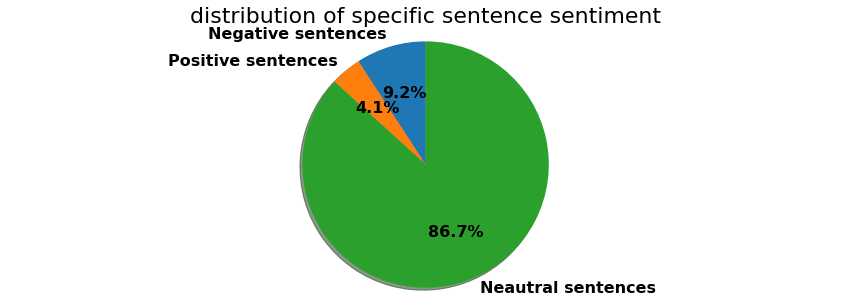

In [54]:
sentences_with_word(spain, spain_words)

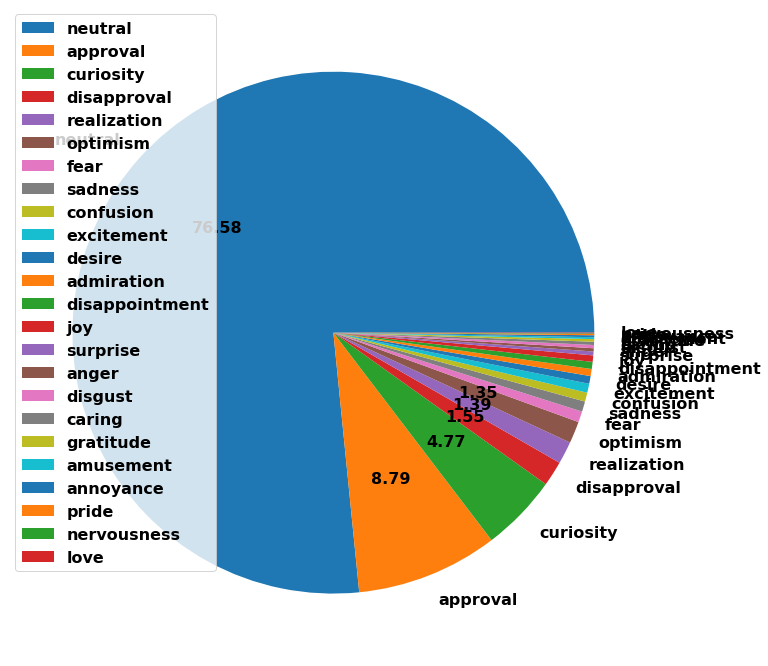

In [21]:
plot_emotions(spain)

## VACCINES

SAMPLES OF POSITIVE HEADLINES
Fernández Vara receives the first dose of AstraZeneca: "I encourage you not to be afraid, this is the solution".
Barceló sees "very positive" the resumption of vaccination with AstraZeneca because "it means restarting the pace set".
Oxford and AstraZeneca announce their coronavirus vaccine is at least 70% effective
SAMPLES OF NEGATIVE HEADLINES
Omeprazole, paracetamol, aspirin... adverse effects may be greater than AstraZeneca and other vaccines
Compromís believes the government was slow to suspend AstraZeneca and the PPCV speaks of "national embarrassment".
Manuel Fajardo, PSOE member of the Senate Bureau, hospitalised after vaccination with Astrazeneca


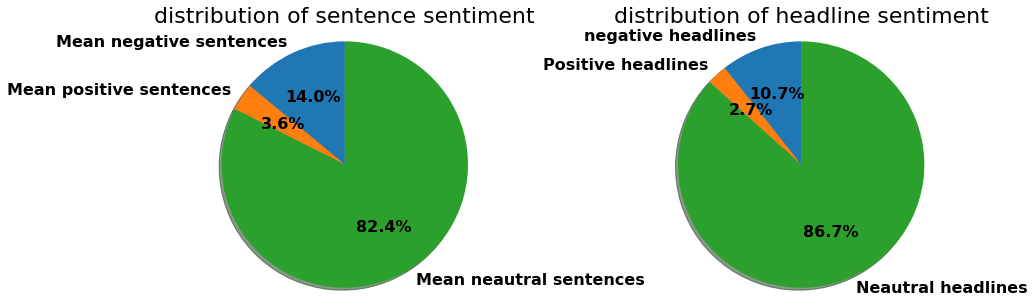

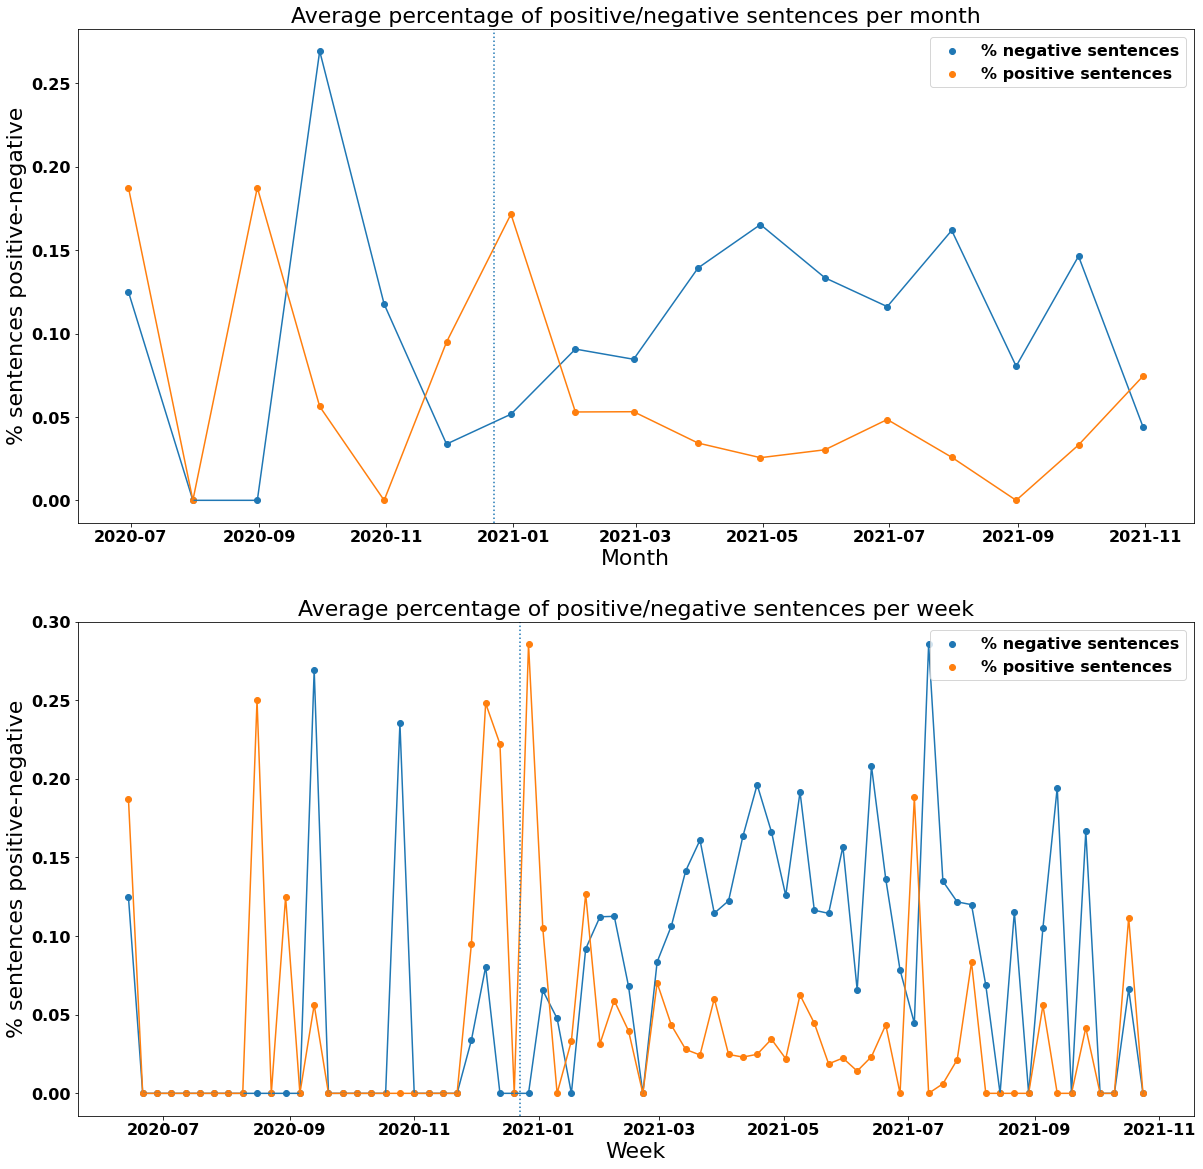

0.0525323275862069

In [55]:
astrazeneca_h=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))&(~df_sub['Title_en'].str.contains("Pfizer|Moderna"))]
sentiment_analysis(astrazeneca_h,'2020-12-23')
len(astrazeneca_h)/len(df_sub)

In [56]:
astrazeneca_h_t=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))|(df_sub['Text_en'].str.contains("Astrazeneca|AstraZeneca"))]

SAMPLES OF POSITIVE SENTENCES
Vaccination with AstraZeneca's Covid-19 vaccine in Spain has once again been given the green light.
It is proven to be effective, well tolerated, easy to administer and AstraZeneca is providing it on a not-for-profit basis," said Pascal Soriot, CEO of AstraZeneca.
SAMPLES OF NEGATIVE SENTENCES
The autopsy of Pilar, the teacher from Malaga who died of a brain haemorrhage 15 days after receiving the first dose of AstraZeneca's vaccine, suggests that her death was unrelated to the administration of the coronavirus vaccine.
acquaintances of acquaintances, we have two cases, a woman of just over sixty years of age, with paralysis of half her body due to ischaemia as a result of the vaccine, and another case of death a week after the injection, also a woman of just under fifty, both with AstraZeneca, which have not appeared in the media and lead us to suspect that they are not counting, far from it, all the cases.


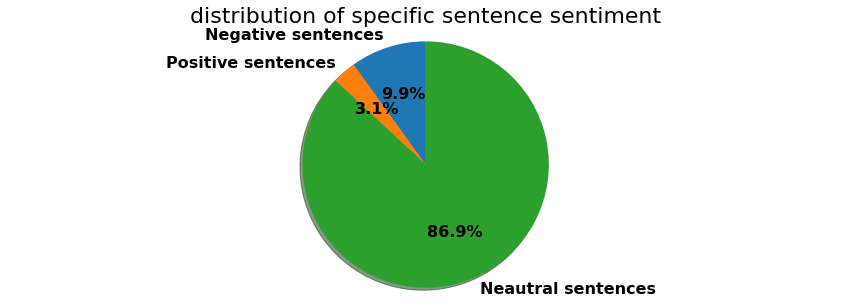

In [57]:
sentences_with_word(astrazeneca_h,'AstraZeneca')

SAMPLES OF POSITIVE HEADLINES
UK approves Pfizer-BioNTech's COVID vaccine and will start to roll it out next week
One of the Seville teachers vaccinated with 6 doses of Pfizer vaccine says he is "practically perfect".
Pfizer announces its Covid-19 vaccine is "90% effective".
SAMPLES OF NEGATIVE HEADLINES
North Korea accused of trying to 'hack' Pfizer for vaccine data
Why the second dose of Pfizer gives more fever or discomfort than the first one
This is how Pfizer rejected public money for its vaccine: "You have to get rid of bureaucracy. Subsidies always come with strings attached.


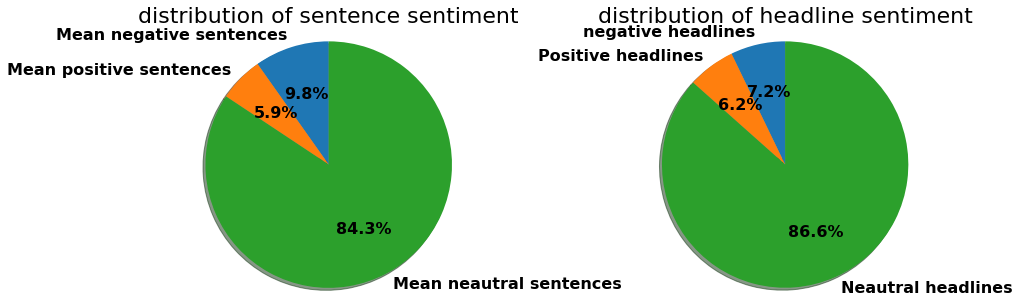

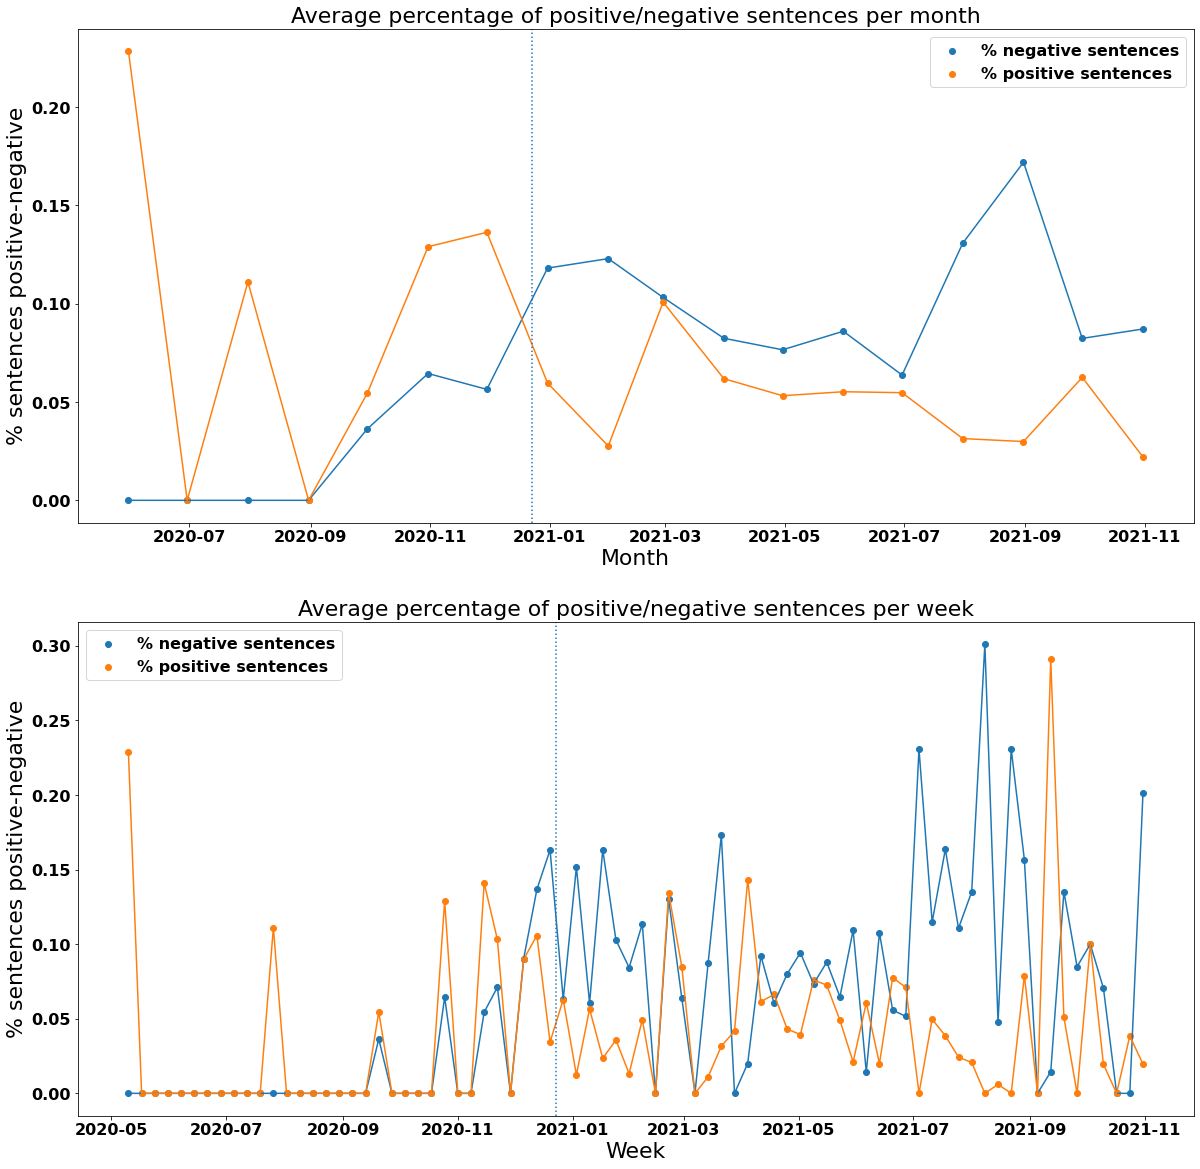

0.02327586206896552

In [58]:
pfizer_h=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Moderna"))]
sentiment_analysis(pfizer_h,'2020-12-23')
len(pfizer_h)/len(df_sub)

In [59]:
pfizer_h_t=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))|(df_sub['Text_en'].str.contains("Pfizer|pfizer"))]

SAMPLES OF POSITIVE SENTENCES
Moderna's (US) mRNA-1273 and BNT162b2 vaccines, from US-based Pfizer and Germany's BioNtech, are based on this ingenious idea.
Pfizer's shot was 52.4% effective in protecting against Covid-19 with symptoms between the first and second dose, according to FDA documents.
SAMPLES OF NEGATIVE SENTENCES
There is no shortage of people wondering why our vaccine will come so late compared to Pfizer or Moderna.
Nor of supply, with complicated logistics for the Pfizer and Moderna vaccines which, because they are kept ultra-cold, will be impossible to use in many countries.


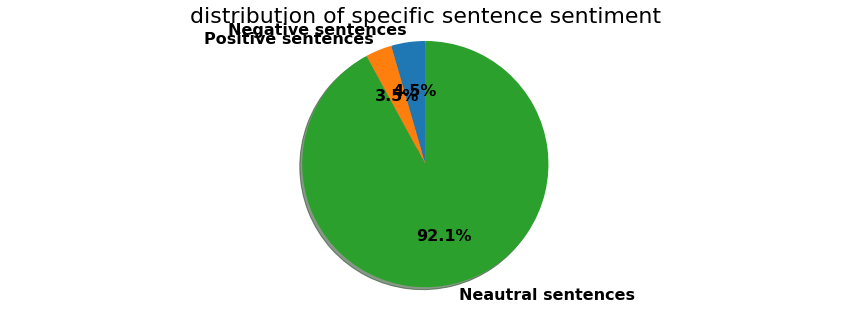

In [60]:
sentences_with_word(pfizer_h_t,'Pfizer')

SAMPLES OF POSITIVE HEADLINES
White House virologist sees Moderna vaccine data as "impressive": "This is very good news".
Moderna vaccine offers high protection against covid in the over-60s
First positive results for Moderna Therapeutics' coronavirus vaccine
SAMPLES OF NEGATIVE HEADLINES
Japan investigates deaths of two people who received vaccine from contaminated Moderna batch
These are the countries that have suspended the use of Moderna vaccines in young people
Moderna vaccine generates more immunity than expected


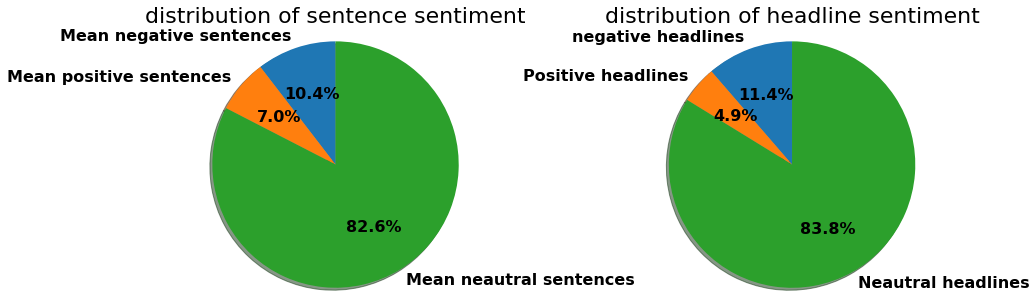

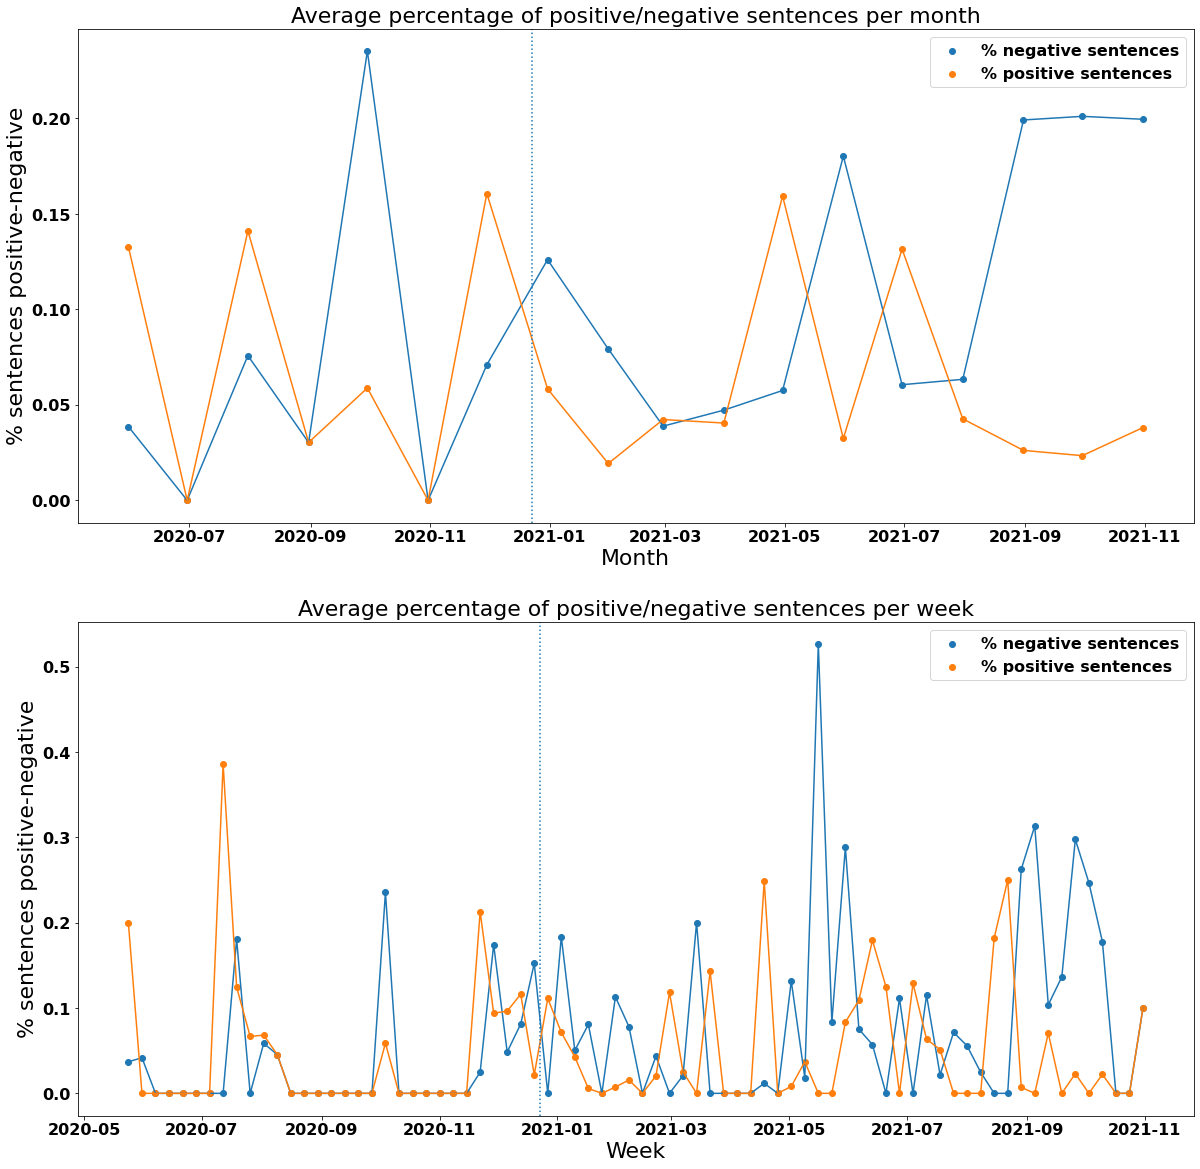

0.009967672413793104

In [61]:
moderna_h=df_sub[(df_sub['Title_en'].str.contains("Moderna|moderna"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Pfizer"))]
sentiment_analysis(moderna_h,'2020-12-23')
len(moderna_h)/len(df_sub)

In [62]:
moderna_h_t=df_sub[(df_sub['Title_en'].str.contains("Moderna"))|(df_sub['Text_en'].str.contains("Moderna"))]

SAMPLES OF POSITIVE SENTENCES
Moderna said Monday that its experimental vaccine is 94.5% effective in preventing coronavirus, according to interim data from a late-stage clinical trial, becoming the second US company in a week to report results that exceed expectations.
Rovi said the next phase of growth will be driven by several key catalysts (Enoxaparin biosimilar, Risperidone-ISM, LetrozolISM, M&A activities or contract with Moderna), backed by a "solid and growing" speciality pharma business.
SAMPLES OF NEGATIVE SENTENCES
Contamination problems with Moderna's Covid-19 vaccine in Japan have widened with the temporary suspension of another million doses, after foreign substances were found in more batches and two people died.
Many people think Moderna is Covid-19.


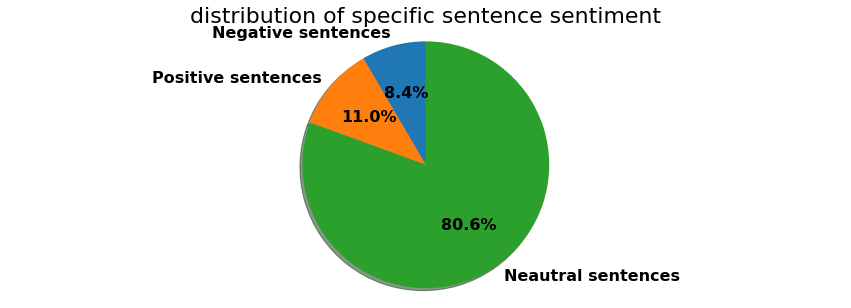

In [63]:
sentences_with_word(moderna_h,'Moderna')

# FREQUENCY OF MENTION OF OTHER COUNTRIES

In [5]:
spain_w= "Spain"
spain_entity=df[(df['Title_en'].str.contains(spain_w))|(df['Text_en'].str.contains(spain_w))]
len(spain_entity)/len(df)

0.37227132360770954

In [6]:
italy_w= "Italy"
italy_entity=df[(df['Title_en'].str.contains(italy_w))|(df['Text_en'].str.contains(italy_w))]
len(italy_entity)/len(df)

0.056969438824406346

In [8]:
france_w= "France"
france_entity=df[(df['Title_en'].str.contains(france_w))|(df['Text_en'].str.contains(france_w))]
len(france_entity)/len(df)

0.07485890746459375

In [9]:
switzerland_w= "Switzerland"
switzerland_entity=df[(df['Title_en'].str.contains(switzerland_w))|(df['Text_en'].str.contains(switzerland_w))]
len(switzerland_entity)/len(df)

0.008944734320093706

In [10]:
uk_w= "United KIngom|UK"
uk_entity=df[(df['Title_en'].str.contains(uk_w))|(df['Text_en'].str.contains(uk_w))]
len(uk_entity)/len(df)

0.10100095836439144